In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('darkgrid')
sb.set_palette("bright", 10)
%matplotlib inline

In [2]:
# Read prosper csv file
prosper = pd.read_csv('prosperLoanData (1).csv')

In [3]:
# View first few rows of the dataframe
prosper.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# See if there are any null values
prosper.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [5]:
prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
# Get the number of rows and columns
prosper.shape

(113937, 81)

In [7]:
# Get summary descriptive statistics of the dataframe
prosper.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### UNIVARIATE EXPLORATION

#### Lets see the distributions of some of the columns

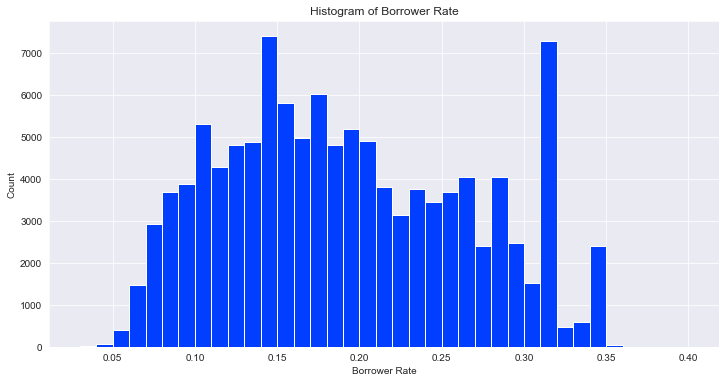

In [8]:
# Plot histogram of borrower rate to see distribution
plt.figure(figsize = [12, 6])
#plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bins = np.arange(0.03, 0.4+0.01, 0.01)
plt.hist(data = prosper, x = 'BorrowerRate', bins=bins)
plt.xlabel('Borrower Rate')
plt.ylabel('Count')
plt.title('Histogram of Borrower Rate');

Bins are set at 0.01 and the distribution is unimodal. Most of the Borrower Rate are concentrated between 0.1 and 0.2. There is also another lower concentration between 0.2 and 0.3. A borrower rate a little above 0.3 has the highest values. We will check it out later

In [9]:
prosper.LenderYield.max()

0.4925

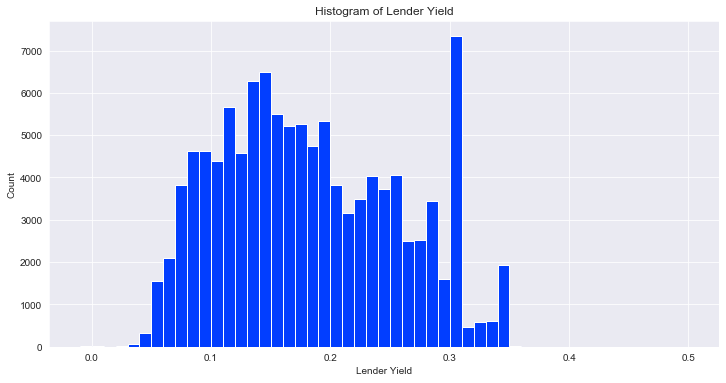

In [10]:
# Plot histogram of Lender yield to see distribution
plt.figure(figsize = [12, 6])
#plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bins = np.arange(-0.01, 0.5+0.01, 0.01)
plt.hist(data = prosper, x = 'LenderYield', bins=bins)
plt.xlabel('Lender Yield')
plt.ylabel('Count')
plt.title('Histogram of Lender Yield');

Bins are set at 0.01 and the distribution is unimodal. Most of the Lender yield values are concentrated from below 0.1 and 0.2. There is also another lower concentration between 0.2 and 0.3. A borrower rate a little above 0.3 has the highest values. 

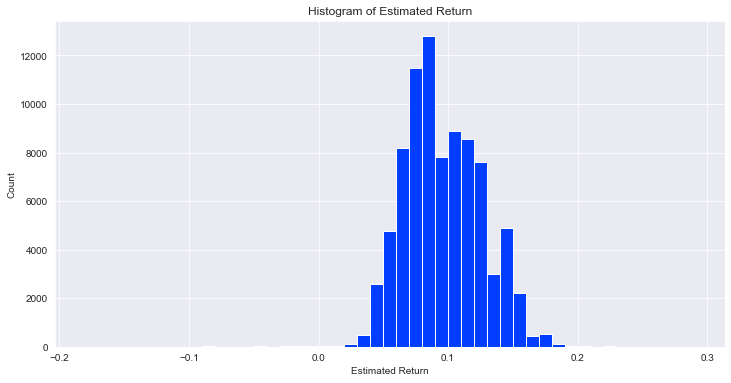

In [11]:
# Plot histogram of Estimated return to see distribution
plt.figure(figsize = [12, 6])
#plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bins = np.arange(-0.18, 0.29+0.01, 0.01)
plt.hist(data = prosper, x = 'EstimatedReturn', bins=bins)
plt.xlabel('Estimated Return')
plt.ylabel('Count')
plt.title('Histogram of Estimated Return');


The histogram of the estimated yield is unimodal. Most values are concentration 0.03 and 0.16. We cant do a log transform because there are negative values 

In [12]:
prosper.ProsperPrincipalBorrowed.value_counts()

4000.00     1857
5000.00     1512
3000.00     1201
2000.00     1180
10000.00     987
            ... 
13501.00       1
4887.05        1
13502.00       1
31101.00       1
2875.00        1
Name: ProsperPrincipalBorrowed, Length: 1442, dtype: int64

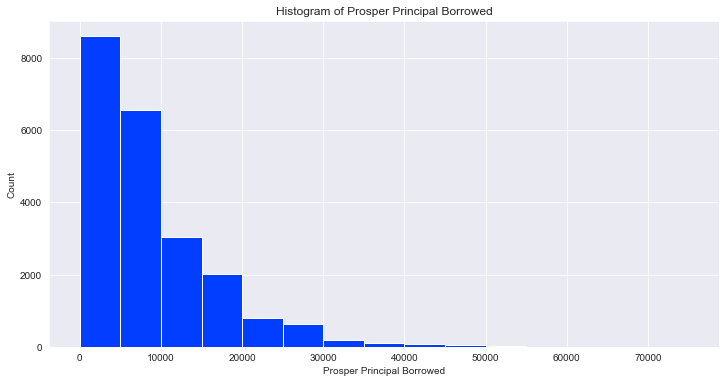

In [13]:
# Plot histogram of Prosper Principal Borrowed to see distribution
plt.figure(figsize = [12, 6])
bins = np.arange(0, 72499+5000, 5000)
plt.hist(data = prosper, x = 'ProsperPrincipalBorrowed', bins=bins)
plt.xlabel('Prosper Principal Borrowed')
plt.ylabel('Count')
plt.title('Histogram of Prosper Principal Borrowed');

The distribution is skewed to the right. Most loans principals are below 30000 with only a fraction above 30000. Might do a log transform later

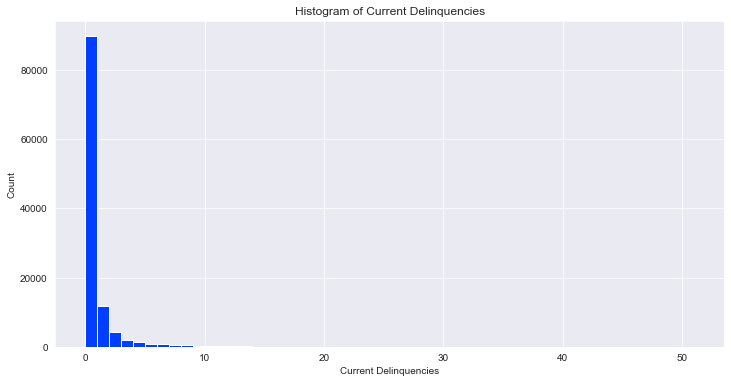

In [14]:
# Plot histogram of Current delinquencies
plt.figure(figsize = [12, 6])
bins = np.arange(0, 51+1, 1)
plt.hist(data = prosper, x = 'CurrentDelinquencies', bins=bins)
plt.xlabel('Current Delinquencies')
plt.ylabel('Count')
plt.title('Histogram of Current Delinquencies');

The histogram of deliquencies is heavily skewed to the right. I chose the bins to be able to see more values but they are so small compared to the others. I would have done a log10 tranform but we have 0 values.

In [15]:
# plt.figure(figsize = [12, 6])
# xlog_data = np.log10(prosper.ProsperPrincipalBorrowed)
# xlog_bin = np.arange(0, 5+0.5, 0.5)
# plt.hist(data=prosper, x=xlog_data)
# plt.xticks(xlog_bin)
# plt.title('Favorite and Retweet Count Log transform scatter plot')
# plt.xlabel('Favorite Count')
# plt.ylabel('Retweet Count');

In [16]:
# Convert income range column to categorical type
level_order = ['$1-24,999','$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not displayed', 'Not employed', '$0']
ord_cat = pd.api.types.CategoricalDtype(ordered=True, categories=level_order)
prosper.IncomeRange = prosper.IncomeRange.astype(ord_cat)

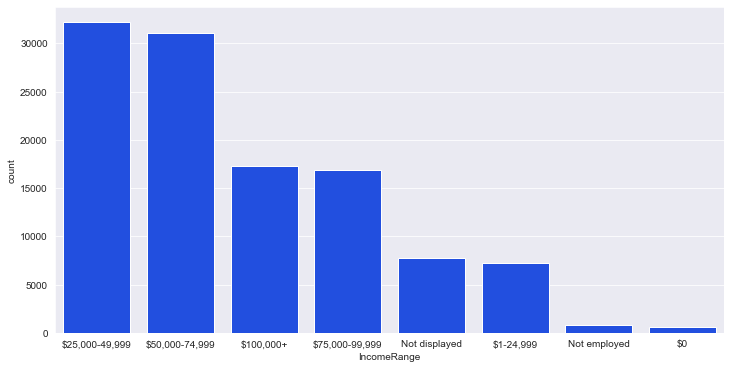

In [17]:
# Plot bar chart of income range
plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]
cat_order = prosper['IncomeRange'].value_counts().index
sb.countplot(data = prosper, x = 'IncomeRange', color = base_color, order = cat_order);

The income range 25k to 49k has the highest while 0 has the lowest

In [18]:
#np.log10(prosper['IncomeRange'].describe())

In [19]:
# #Lets perform a log transform since most values are skewed to the right
# bin_edges = 10 ** np.arange(0.8, np.log10(data.max())+0.1, 0.1)
# plt.hist(data, bins = bin_edges)
# plt.xscale('log')
# tick_locs = [10, 30, 100, 300, 1000, 3000]
# plt.xticks(tick_locs, tick_locs)


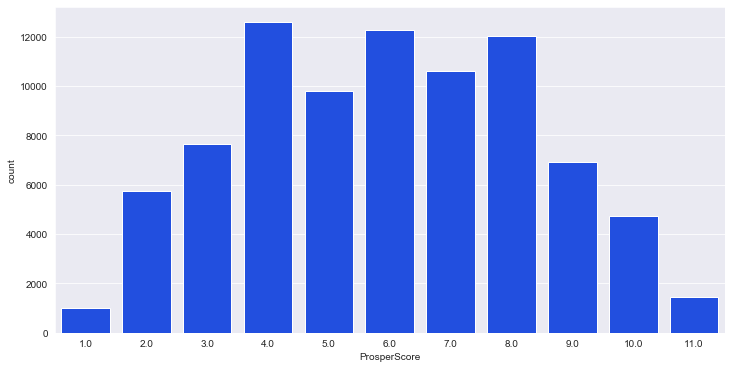

In [20]:
# Prosper score barplot
plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]
sb.countplot(data = prosper, x = 'ProsperScore', color = base_color);

Prosper scores are concentrated between 4 and 8

In [21]:
# level_order = ['Premium Gasoline', 'Regular Gasoline']
# ord_cat = pd.api.types.CategoricalDtype(ordered=True, categories=level_order)
# fe.fuelType = fe.fuelType.astype(ord_cat)

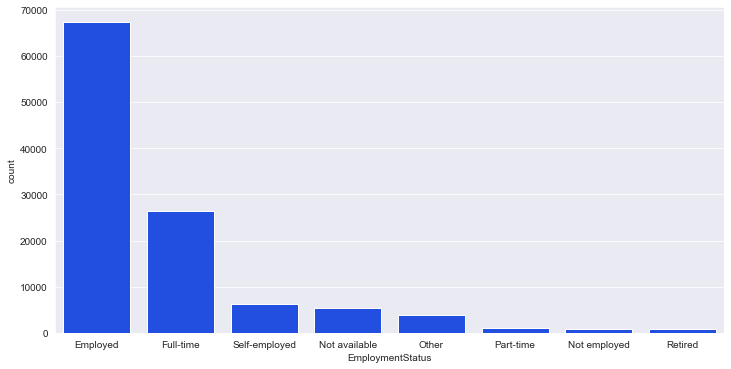

In [22]:
# Listing Employment Status barplot
plt.figure(figsize = [12, 6])
cat_order = prosper['EmploymentStatus'].value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data = prosper, x = 'EmploymentStatus', color = base_color, order=cat_order);

Obviously the employed and those with full time employment are the highest number of loans

In [23]:
# I want to see the occupations of loan seekers
prosper.Occupation.value_counts()[:10]

Other                       28617
Professional                13628
Computer Programmer          4478
Executive                    4311
Teacher                      3759
Administrative Assistant     3688
Analyst                      3602
Sales - Commission           3446
Accountant/CPA               3233
Clerical                     3164
Name: Occupation, dtype: int64

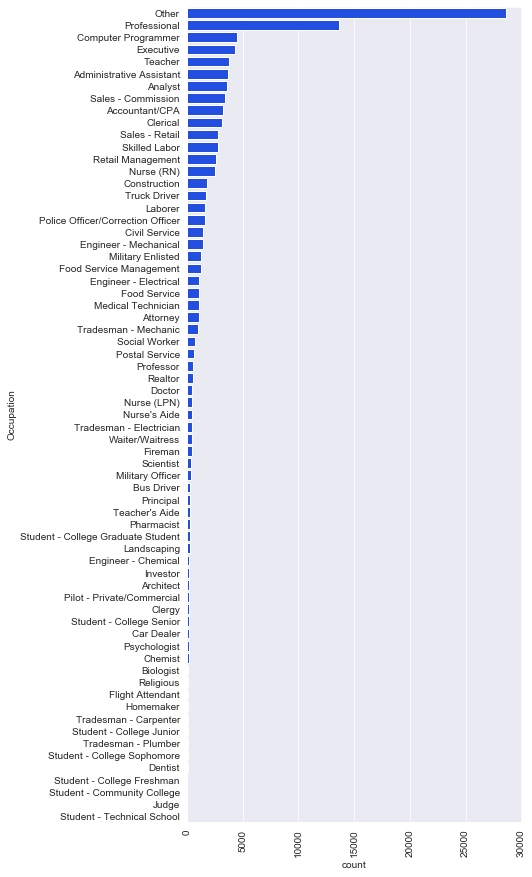

In [24]:
# Plot occupation barplot
plt.figure(figsize = [6, 15])
cat_order = prosper['Occupation'].value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data = prosper, y = 'Occupation', color = base_color, order=cat_order);
plt.xticks(rotation=90);

Those listed as other have highest number of occupations followed by professional. Students are at the tail end of occupations listed

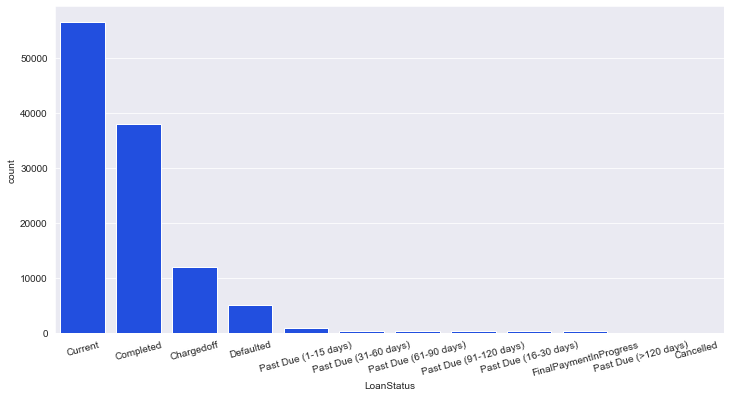

In [25]:
# Convert Loan Status to categorical data type
prosper.LoanStatus = prosper.LoanStatus.astype('category')
# Listing Category barplot
plt.figure(figsize = [12, 6])
cat_order = prosper['LoanStatus'].value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data = prosper, x = 'LoanStatus', color = base_color, order=cat_order)
plt.xticks(rotation=15);

Current loans are the highest. There is also an impressive number of completed loans

### BIVARIATE EXPLORATION

#### Now lets explore the various relationships between columns in dataframe

In [26]:
#prosper.corr()
# Lets check other columns correlation with Current delinquency
prosper[prosper.columns[39:80]].corrwith(prosper['CurrentDelinquencies'])

PublicRecordsLast12Months              0.111661
RevolvingCreditBalance                -0.088831
BankcardUtilization                   -0.043773
AvailableBankcardCredit               -0.092433
TotalTrades                           -0.000236
TradesNeverDelinquent (percentage)    -0.458761
TradesOpenedLast6Months               -0.004043
DebtToIncomeRatio                     -0.024265
IncomeVerifiable                       0.042920
StatedMonthlyIncome                   -0.038835
TotalProsperLoans                     -0.017344
TotalProsperPaymentsBilled             0.023386
OnTimeProsperPayments                  0.018166
ProsperPaymentsLessThanOneMonthLate    0.040969
ProsperPaymentsOneMonthPlusLate        0.014194
ProsperPrincipalBorrowed              -0.088950
ProsperPrincipalOutstanding           -0.061750
ScorexChangeAtTimeOfListing           -0.041066
LoanCurrentDaysDelinquent              0.212895
LoanFirstDefaultedCycleNumber         -0.058701
LoanMonthsSinceOrigination             0

In [27]:
# Change listing date to datetime type
prosper.ListingCreationDate =  pd.to_datetime(prosper['ListingCreationDate'])

In [28]:

#prosper['year'] = prosper['ListingCreationDate'].dt.year

In [29]:
prosper.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What factors contribute to loan deliquency?

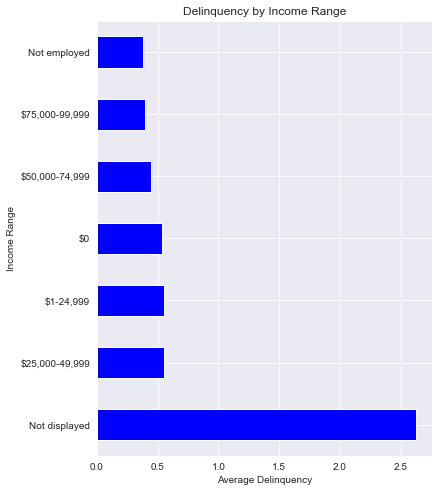

In [30]:
# Lets see how deliquency fares by income range
# Group by income range
income_del = prosper.groupby('IncomeRange').mean().CurrentDelinquencies.sort_values(ascending=False)[:7]
income_del
# Plot bar chart
plt.figure(figsize = [6, 8])
income_del.plot(kind="barh", color="blue")
plt.title('Delinquency by Income Range')
plt.xlabel('Average Delinquency')
plt.ylabel('Income Range');

Those with no income had the highest delinquncy while the unemployed had the lowest. The higher the income range the lower the rate of delinquency. The trend is only different for the 1k to 24k group which has less delinquency than the 100k range

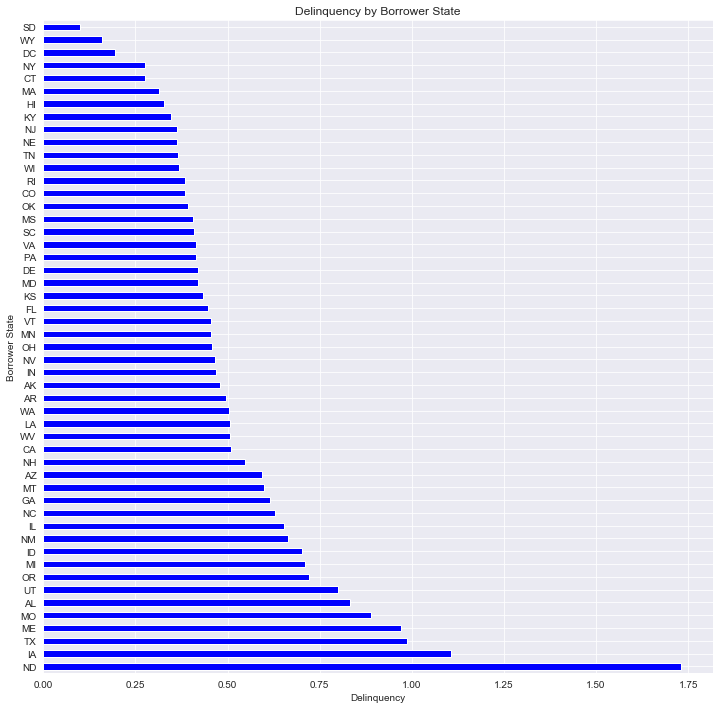

In [31]:
# Delinquent loans by borrower state
#Convert to categorical
prosper.BorrowerState = prosper.BorrowerState.astype('category')
# Plot delinquencies by state
state_del = prosper.groupby('BorrowerState').mean().CurrentDelinquencies.sort_values(ascending=False)
plt.figure(figsize = [12, 12])
state_del.plot(kind="barh", color="blue")
plt.title('Delinquency by Borrower State')
plt.xlabel('Delinquency')
plt.ylabel('Borrower State');

In [32]:
state_del

BorrowerState
ND    1.730769
IA    1.107527
TX    0.986251
ME    0.969697
MO    0.888804
AL    0.832339
UT    0.799087
OR    0.720418
MI    0.711142
ID    0.702341
NM    0.664544
IL    0.653762
NC    0.628729
GA    0.615554
MT    0.598784
AZ    0.593898
NH    0.546279
CA    0.509321
WV    0.507692
LA    0.506821
WA    0.504593
AR    0.494737
AK    0.480000
IN    0.468208
NV    0.466972
OH    0.458899
MN    0.454899
VT    0.454106
FL    0.446314
KS    0.433145
MD    0.420773
DE    0.420000
PA    0.415012
VA    0.414277
SC    0.409091
MS    0.405337
OK    0.391349
CO    0.385695
RI    0.383908
WI    0.369565
TN    0.366149
NE    0.363501
NJ    0.361640
KY    0.346897
HI    0.327628
MA    0.312807
CT    0.276583
NY    0.276349
DC    0.193717
WY    0.160000
SD    0.100529
Name: CurrentDelinquencies, dtype: float64

North Carolina has the highest delinquencies with an average of 47.9% delinquency while South Dakota has the lowest with only 10.12%.

In [33]:
# Rename Listing Category column
prosper.rename(columns={"ListingCategory (numeric)" : "ListingCategory"}, inplace = True)

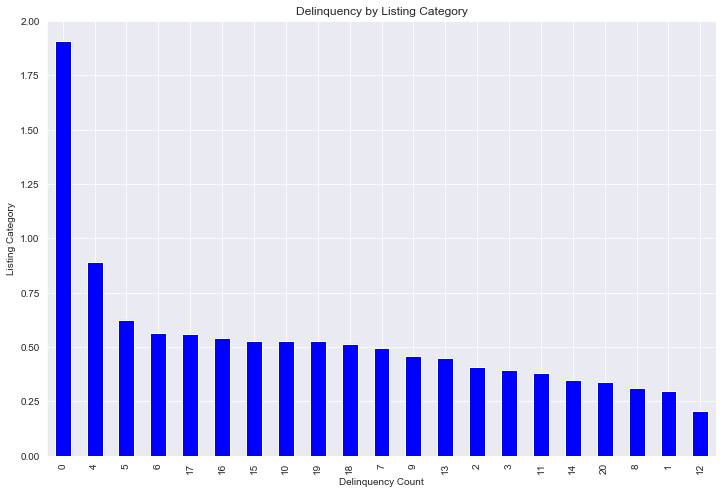

In [34]:
# # Plot delinquencies by listing category
# level_order2 = ['Not Available','Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Auto',
#                'Household Expenses', 'Medical/Dental', 'Taxes', 'Large Purchases', 'Wedding Loans', 'Vacation',  'Student Use', 
#                'Motorcycle', 'Engagement Ring', 'Baby&Adoption', 'Cosmetic Procedure', 'Boat', 'Green Loans', 'RV']
# ord_cat2 = pd.api.types.CategoricalDtype(ordered=True, categories=level_order2)
# prosper.ListingCategory = prosper.ListingCategory.astype(ord_cat2)

cat_del = prosper.groupby('ListingCategory').mean().CurrentDelinquencies.sort_values(ascending=False)
plt.figure(figsize = [12, 8])
cat_del.plot(kind="bar", color="blue");
plt.title('Delinquency by Listing Category')
plt.xlabel('Delinquency Count')
plt.ylabel('Listing Category');

The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

From the bar chart we can see that the most delinquent Listing category are RV with 56.86% delinquency closely Auto with 56.78%. The lowest are the Not available category with only 10%.

In [35]:
cat_del

ListingCategory
0     1.905493
4     0.889214
5     0.624339
6     0.565150
17    0.557692
16    0.542763
15    0.528252
10    0.527473
19    0.526042
18    0.515254
7     0.494806
9     0.458824
13    0.447395
2     0.406755
3     0.391710
11    0.377880
14    0.347032
20    0.337224
8     0.311558
1     0.298295
12    0.203390
Name: CurrentDelinquencies, dtype: float64

In [36]:
#archive_clean.dog_stage = archive_clean.dog_stage.astype('category')

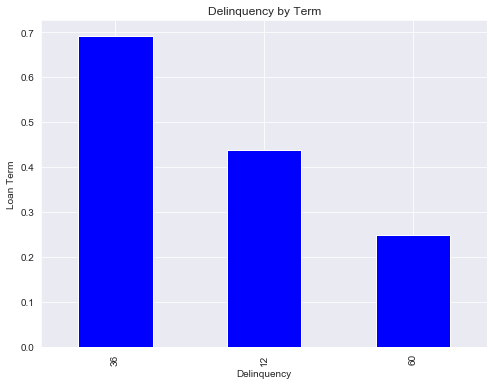

In [37]:
# Delinquency by loan term
# Convert loan term to categorical data type
#level = ['36', '60', '12']
#cat = pd.api.types.CategoricalDtype(ordered=True, categories=level)
prosper.Term = prosper.Term.astype('category')

term_del = prosper.groupby('Term').mean().CurrentDelinquencies.sort_values(ascending=False)
plt.figure(figsize = [8, 6])
term_del.plot(kind="bar", color="blue");
plt.title('Delinquency by Term')
plt.xlabel('Delinquency')
plt.ylabel('Loan Term');

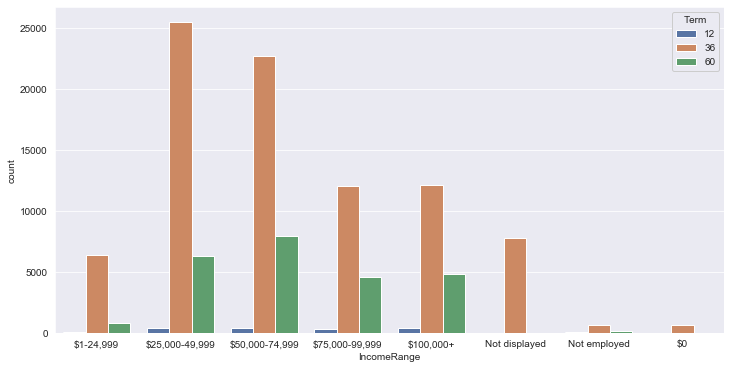

In [38]:
# Explore loan status by income range
plt.figure(figsize = [12, 6])
ax = sb.countplot(data = prosper, x = 'IncomeRange', hue = 'Term', palette = 'deep')
ax.legend(loc = 1, framealpha = 5, title = 'Term');

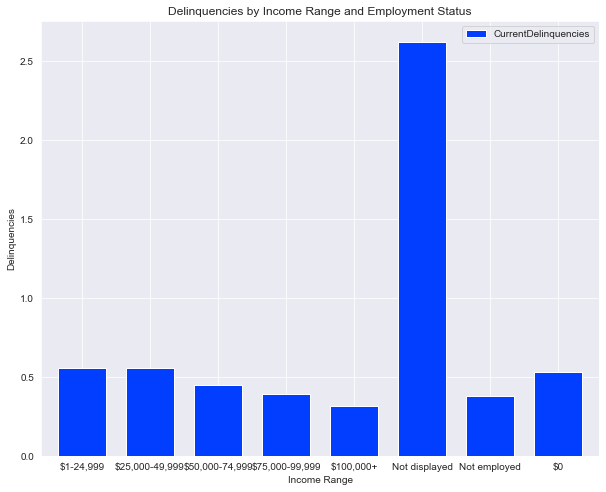

In [39]:
# Lets add Employement status to the Delinquencies by Income range
iec = (prosper.pivot_table(index='IncomeRange', values='CurrentDelinquencies', aggfunc='mean', dropna=True))
iec.plot(kind='bar', stacked=False, figsize=(10,8), width= 0.7)
plt.xticks(rotation=0)
plt.xlabel('Income Range')
plt.ylabel('Delinquencies')
plt.title('Delinquencies by Income Range and Employment Status');

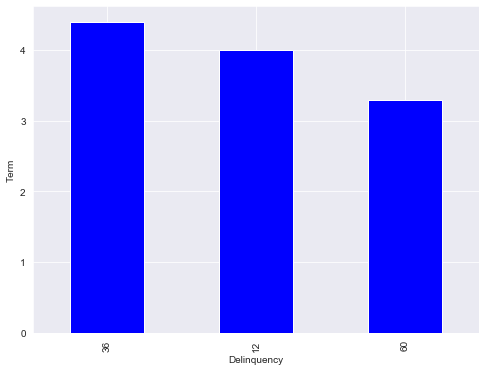

In [40]:
# Lets see if the trend is different for Delinquency by loan term over 7 years
term_del7 = prosper.groupby('Term').mean().DelinquenciesLast7Years.sort_values(ascending=False)
plt.figure(figsize = [8, 6])
term_del7.plot(kind="bar", color="blue");
plt.xlabel('Delinquency')
plt.ylabel('Term');

The shorter the loan term, the more delinquent it is. 12 months has 43.89%, 36 months has 35.49% and 60 months has 25.16%

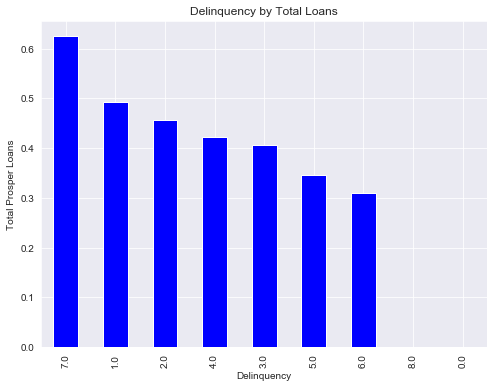

In [41]:
# Delinquency by number of loans
loans_del = prosper.groupby('TotalProsperLoans').mean().CurrentDelinquencies.sort_values(ascending=False)
plt.figure(figsize = [8, 6])
loans_del.plot(kind="bar", color="blue");
plt.title('Delinquency by Total Loans')
plt.xlabel('Delinquency')
plt.ylabel('Total Prosper Loans');

Those with 7 prosper loans have a very high delinquency rate of 83.33%. The others are in the 40% range. While 8 has 0%. Cant see any trend here

In [42]:
prosper.DebtToIncomeRatio.value_counts()
# term_ratio = prosper.groupby('Term').sum().TotalProsperLoans
# plt.figure(figsize = [8, 6])
# term_ratio.plot(kind="bar", color="blue");

0.18000    4132
0.22000    3687
0.17000    3616
0.14000    3553
0.20000    3481
           ... 
0.13774       1
0.04983       1
0.15248       1
0.19893       1
0.06056       1
Name: DebtToIncomeRatio, Length: 1207, dtype: int64

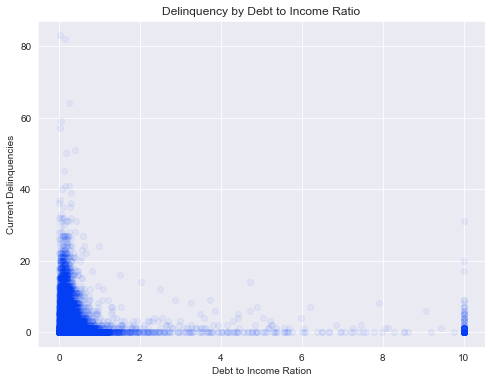

In [43]:
# Relationship between estimated return and lender yield
plt.figure(figsize = [8, 6])
plt.scatter(data=prosper, x='DebtToIncomeRatio', y='CurrentDelinquencies', alpha=1/20)
plt.title('Delinquency by Debt to Income Ratio')
plt.xlabel('Debt to Income Ration')
plt.ylabel('Current Delinquencies');

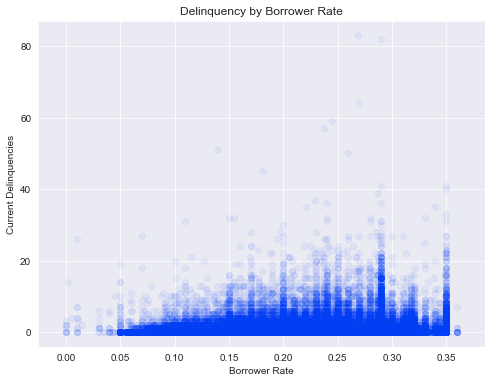

In [44]:
# Relationship between estimated return and lender yield
plt.figure(figsize = [8, 6])
plt.scatter(data=prosper, x='BorrowerRate', y='CurrentDelinquencies', alpha=1/20)
plt.title('Delinquency by Borrower Rate')
plt.xlabel('Borrower Rate')
plt.ylabel('Current Delinquencies');

As the Borrower rate increase, the delinquency is also increasing showing a good positive relationship

In [45]:
np.log10(prosper['CurrentDelinquencies'].describe())

C:\Users\max\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.054000
mean    -0.227640
std      0.296381
min          -inf
25%          -inf
50%          -inf
75%          -inf
max      1.919078
Name: CurrentDelinquencies, dtype: float64

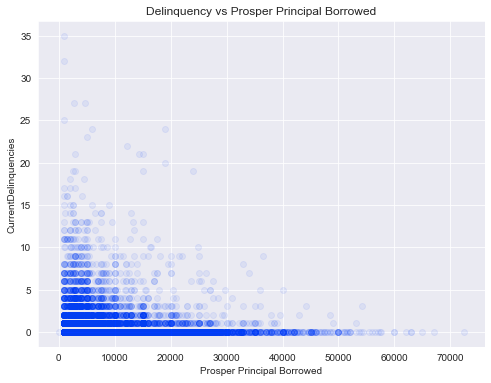

In [46]:
# Relationship between Principal  and Current Delinquencies
plt.figure(figsize = [8, 6])
plt.scatter(data=prosper, x='ProsperPrincipalBorrowed', y='CurrentDelinquencies', alpha=1/15);
plt.title('Delinquency vs Prosper Principal Borrowed')
plt.xlabel('Prosper Principal Borrowed')
plt.ylabel('CurrentDelinquencies');

The relationship between the Principal Borrowed and Current Delinquencies is a negative one. As the Principal Borrowed increased, the rate of Delinquency reduced. Higher value loans are less delinquent

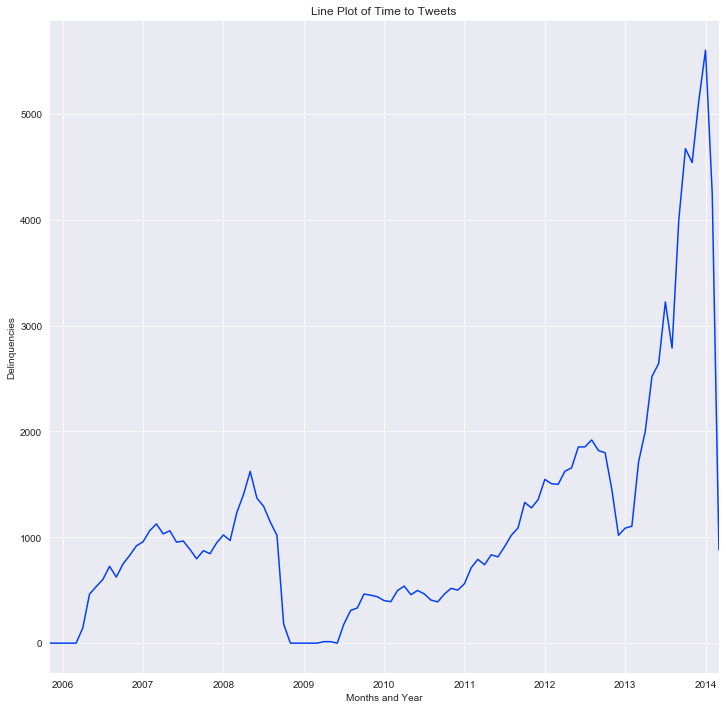

In [47]:
# Delinquencies by year
#Convert Listing creation date to datetime
prosper.ListingCreationDate =  pd.to_datetime(prosper['ListingCreationDate'])
# Get number of tweets per month
month_del = prosper.groupby(pd.Grouper(key='ListingCreationDate', freq='M')).count().CurrentDelinquencies
month_del.plot(kind='line', figsize=(12,12))
plt.xlabel('Months and Year')
plt.ylabel('Delinquencies')
plt.title('Line Plot of Time to Tweets');

Delinquencies were on the rise from 2006 up to sometime in 2008. They then dropped up to 2009 before rising consistently up till 2012 when it dipped again. It continued to rise in 2013.


We have seen relationships between Current Delinquencies and Income range, state, listing category, term, total prosper loans, debt to income ratio, borrower rate, principal borrowed and listing date.

### What affects prosper score and corr with interest rate OR What affects outcome of lenders yield

In [48]:
#The prosper score is rated between 1 - 10. Remove all that dont fall into that category
prosper = prosper.query('ProsperScore <= 10')

In [49]:
# Convert to categorical data type
prosper.ProsperScore = prosper.ProsperScore.astype('category')

In [50]:
# Lets check other columns correlation with Prosper score
prosper[prosper.columns[0:40]].corrwith(prosper['ProsperScore'])

ListingNumber                 -0.160887
BorrowerAPR                   -0.653729
BorrowerRate                  -0.635132
LenderYield                   -0.635183
EstimatedEffectiveYield       -0.618545
EstimatedLoss                 -0.664633
EstimatedReturn               -0.354431
ProsperRating (numeric)        0.694641
ListingCategory               -0.008384
EmploymentStatusDuration      -0.010026
IsBorrowerHomeowner            0.056793
CurrentlyInGroup               0.025525
CreditScoreRangeLower          0.362683
CreditScoreRangeUpper          0.362683
CurrentCreditLines            -0.021460
OpenCreditLines               -0.015833
TotalCreditLinespast7years    -0.046425
OpenRevolvingAccounts          0.019051
OpenRevolvingMonthlyPayment    0.002554
InquiriesLast6Months          -0.296335
TotalInquiries                -0.221269
CurrentDelinquencies          -0.096693
AmountDelinquent              -0.040047
DelinquenciesLast7Years       -0.092892
PublicRecordsLast10Years      -0.080070


In [51]:
prosper.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
1.0       992
Name: ProsperScore, dtype: int64

In [52]:
# status_means = prosper.groupby('LoanStatus').sum()
# year_order = status_means.sort_values('year', ascending = False).index

# g = sb.FacetGrid(data = prosper, col = 'LoanStatus', col_wrap = 3, size = 2, col_order = year_order)
# # try sb.distplot instead of plt.hist to see the plot in terms of density!
# g.map(plt.bar, 'year', bins = np.arange(2009, prosper['year'].max()+1, 1))
# g.set_titles('{col_name}');

In [53]:
# Extract year from listing date and add new column to listing date
prosper['year'] = prosper['ListingCreationDate'].dt.year

In [54]:
prosper.year.value_counts()

2013    34524
2012    19556
2011    11442
2014    10167
2010     5530
2009     2178
Name: year, dtype: int64

In [55]:
prosper.LoanStatus.value_counts()

Current                   55157
Completed                 19633
Chargedoff                 5336
Defaulted                  1004
Past Due (1-15 days)        805
Past Due (31-60 days)       363
Past Due (61-90 days)       312
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      202
Past Due (>120 days)         16
Cancelled                     0
Name: LoanStatus, dtype: int64

In [56]:
prosper.IncomeRange.value_counts()

$50,000-74,999    25261
$25,000-49,999    24047
$100,000+         14565
$75,000-99,999    14183
$1-24,999          4647
Not employed        649
$0                   45
Not displayed         0
Name: IncomeRange, dtype: int64

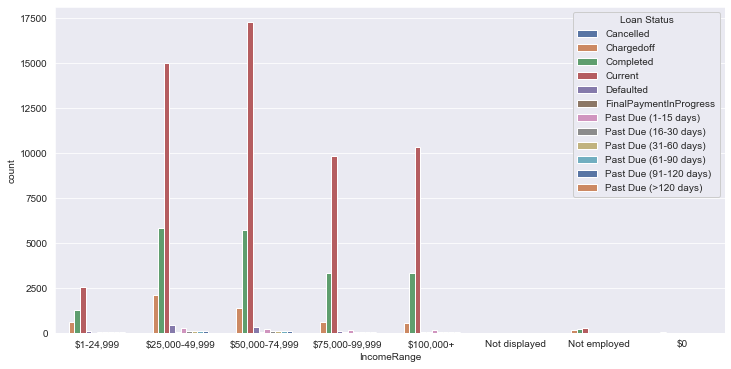

In [57]:
# Explore loan status by income range
plt.figure(figsize = [12, 6])
ax = sb.countplot(data = prosper, x = 'IncomeRange', hue = 'LoanStatus', palette = 'deep')
ax.legend(loc = 1, framealpha = 5, title = 'Loan Status');

50 to 75k have the most current loans. 25 to 50k have the most completed. thos with no income displayed have the most defaults

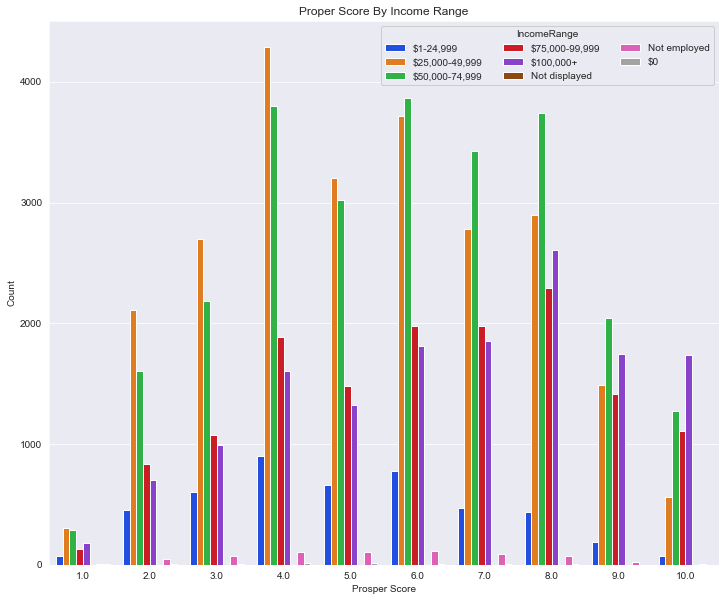

In [58]:
plt.figure(figsize = [12, 10])
ax = sb.countplot(data = prosper, x = 'ProsperScore', hue = 'IncomeRange')
ax.legend(loc = 0, ncol = 3, framealpha = 1, title = 'IncomeRange');
plt.xlabel('Prosper Score')
plt.ylabel('Count')
plt.title('Proper Score By Income Range');

The income range of 25k to 49k are highest for lower prosper scores 5 to 1. However for the higher scores between 6 and 7 its 50 to 74k that are on top. the 100k top also have high prosper scores peaking at 8. The 1k to 24k range peaked at prosper score 4 and kept declining up to 10

In [59]:
# ct_counts = prosper.groupby(['IncomeRange', 'ProsperScore']).size()
# ct_counts = ct_counts.reset_index('count')
# ct_counts = ct_counts.pivot(index = 'ProsperScore', columns = 'IncomeRange', values = 'count')
# sb.heatmap(ct_counts, annot = True, fmt = 'd')

In [60]:
# Prosper score by income range
# pros_income = prosper.groupby('IncomeRange').mean().ProsperScore.sort_values(ascending=False)

# plt.figure(figsize = [8, 6])
# pros_income.plot(kind="bar", color="blue");
# plt.title('Prosper Score by Income Range')
# plt.xlabel('Income Range')
# plt.ylabel('Mean Prosper Score');

As expected those with 100k or more had the highest mean prosper score and it continues to decrease as income decrease. Will be interesting to add home owners and states in multivariate to see they fare

In [61]:
prosper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83397 entries, 1 to 113936
Data columns (total 82 columns):
ListingKey                             83397 non-null object
ListingNumber                          83397 non-null int64
ListingCreationDate                    83397 non-null datetime64[ns]
CreditGrade                            0 non-null object
Term                                   83397 non-null category
LoanStatus                             83397 non-null category
ClosedDate                             25973 non-null object
BorrowerAPR                            83397 non-null float64
BorrowerRate                           83397 non-null float64
LenderYield                            83397 non-null float64
EstimatedEffectiveYield                83397 non-null float64
EstimatedLoss                          83397 non-null float64
EstimatedReturn                        83397 non-null float64
ProsperRating (numeric)                83397 non-null float64
ProsperRating (Alpha) 

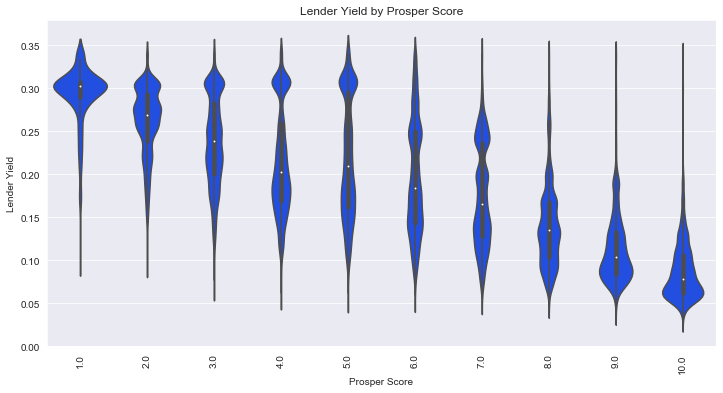

In [62]:
# Prosper score and loan status
plt.figure(figsize = [12, 6])
sb.violinplot(data = prosper, x = 'ProsperScore', y = 'LenderYield', color = base_color)
plt.xticks(rotation=90)
plt.title('Lender Yield by Prosper Score')
plt.xlabel('Prosper Score')
plt.ylabel('Lender Yield');

The lower the Prosper Score the higher the Lenders Yield and the higher the Prosper score the lower the yield. Riskier loans have higher lender yields

In [63]:
#Convert to categorical
prosper.EmploymentStatus = prosper.EmploymentStatus.astype('category')
prosper.EmploymentStatus.value_counts()

Employed         65945
Full-time         7913
Self-employed     4495
Other             3772
Not employed       649
Retired            367
Part-time          256
Name: EmploymentStatus, dtype: int64

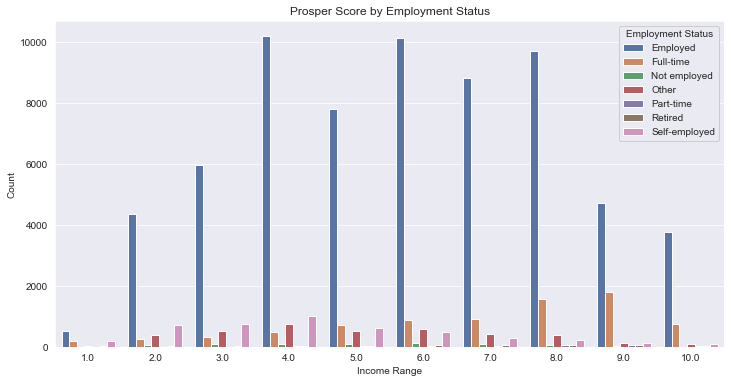

In [64]:
# Explore Prosper Score by Employement status
plt.figure(figsize = [12, 6])
ax = sb.countplot(data = prosper, x = 'ProsperScore', hue = 'EmploymentStatus', palette = 'deep')
ax.legend(loc = 1, framealpha = 5, title = 'Employment Status')
plt.title('Prosper Score by Employment Status')
plt.xlabel('Income Range')
plt.ylabel('Count');

The employed have the highest numbers across all scores followed by those with full time employment. The unemployed, part-time and retired barely show up in the prosper score count.

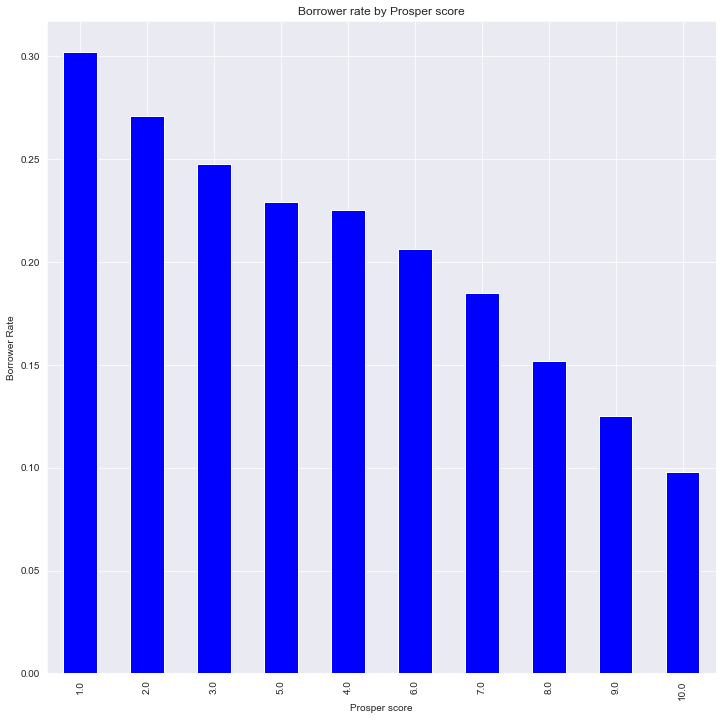

In [65]:
# Relationship between borrower  rate and prosper score
prosper_rate = prosper.groupby('ProsperScore').mean().BorrowerRate.sort_values(ascending=False)
plt.figure(figsize = [12, 12])
prosper_rate.plot(kind="bar", color="blue")
plt.title('Borrower rate by Prosper score')
plt.xlabel('Prosper score')
plt.ylabel('Borrower Rate');

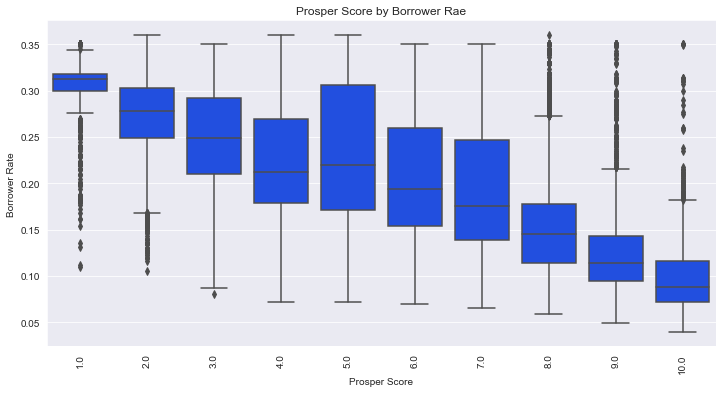

In [66]:
# Relationship between borrower  rate and prosper score
plt.figure(figsize = [12, 6])
sb.boxplot(data = prosper, x = 'ProsperScore', y = 'BorrowerRate', color = base_color)
plt.xticks(rotation=90)
plt.title('Prosper Score by Borrower Rae')
plt.xlabel('Prosper Score')
plt.ylabel('Borrower Rate');

Unsuprinsingly those with higher prosper scores are given lower interest rates. There is only a slight glitch between 5 and 4 then continues dropping until prosper score 10. There are outliers on both sides of the scores

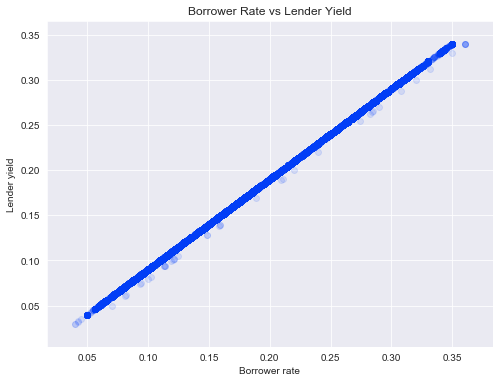

In [67]:
# Relationship between Borrower rate  and Lender yield
plt.figure(figsize = [8, 6])
plt.scatter(data=prosper, x='BorrowerRate', y='LenderYield', alpha=1/9);
plt.xlabel('Borrower rate')
plt.ylabel('Lender yield')
plt.title('Borrower Rate vs Lender Yield');

Shows a strong positive relationship where lender yield increases with borrower rate increase. As the borrower rate increased, the Lender yield increased

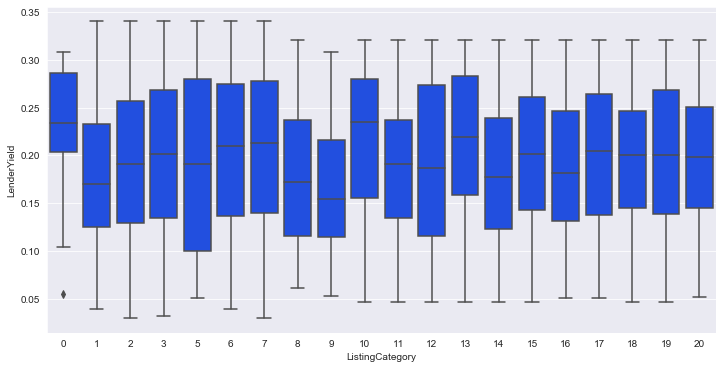

In [68]:
# Prosper score and listing category
plt.figure(figsize = [12, 6])
sb.boxplot(data = prosper, x = 'ListingCategory', y = 'LenderYield', color = base_color);

In Listing Category, Cosmetic proceedures have highest Lender yield and the lowest is boat

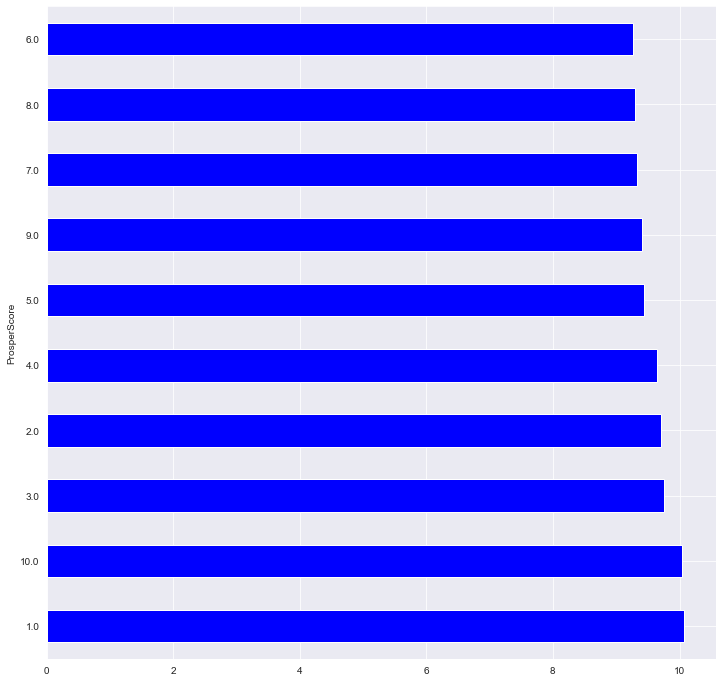

In [69]:
#prosper.OpenCreditLines.value_counts()
ocl_ps = prosper.groupby('ProsperScore').mean().OpenCreditLines.sort_values(ascending=False)
plt.figure(figsize = [12, 12])
ocl_ps.plot(kind="barh", color="blue");

This doesnt tell us that much because both high and low prosper scores have many open credit lines

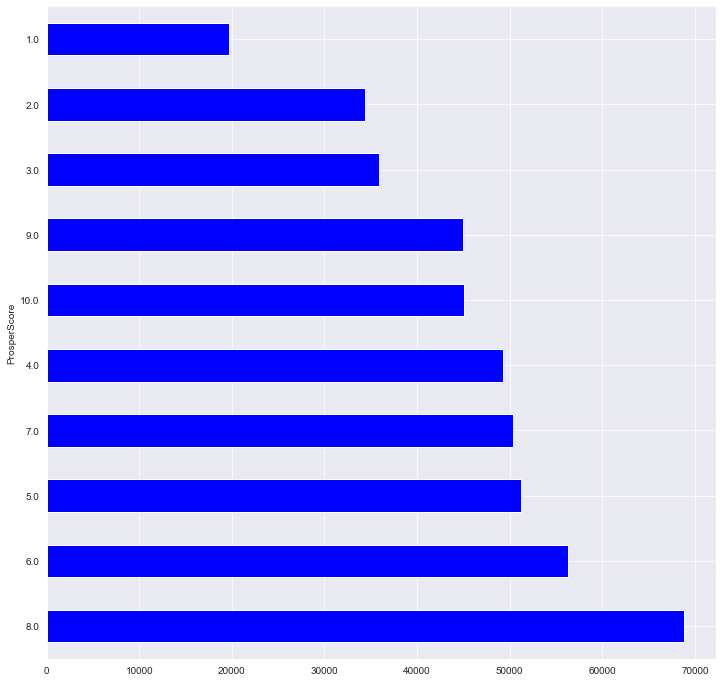

In [70]:
# Prosper score by total prosper payments billed
tpp_ps = prosper.groupby('ProsperScore').sum().TotalProsperPaymentsBilled.sort_values(ascending=False)
plt.figure(figsize = [12, 12])
tpp_ps.plot(kind="barh", color="blue");

This is also a mixed bag. There isnt a clear pattern with higher or lower prosper scores having more billed payments

In [71]:
prosper.TotalProsperLoans.value_counts()

1.0    12965
2.0     4174
3.0     1335
4.0      379
5.0       86
6.0       23
7.0        6
0.0        1
8.0        1
Name: TotalProsperLoans, dtype: int64

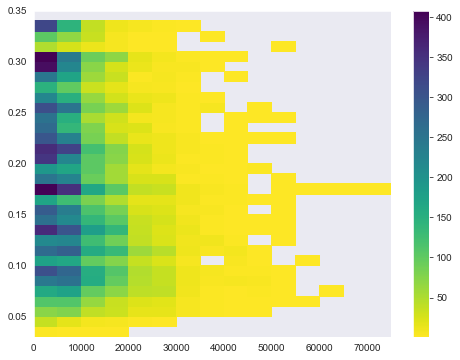

In [72]:
# Lets take a look at lenders yield and principal borrowed
plt.figure(figsize = [8, 6])
bins_x = np.arange(0, 72499+5000, 5000)
bins_y = np.arange(0.03, 0.34+0.01, 0.01)
plt.hist2d(data = prosper, x = 'ProsperPrincipalBorrowed', y = 'LenderYield',
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar();

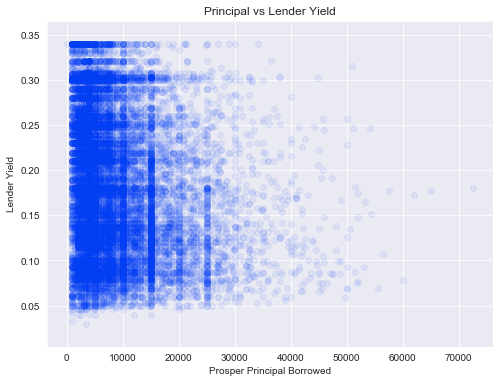

In [73]:
# Relationship between Principal  and Lender Yield
plt.figure(figsize = [8, 6])
plt.scatter(data=prosper, x='ProsperPrincipalBorrowed', y='LenderYield', alpha=1/15);
plt.xlabel('Prosper Principal Borrowed')
plt.ylabel('Lender Yield')
plt.title('Principal vs Lender Yield');

Most loans are below $30,000 and offer a variety of yields. 30 to 40k have a moderate amount of loans. The higher loans occur less often and have lower yields

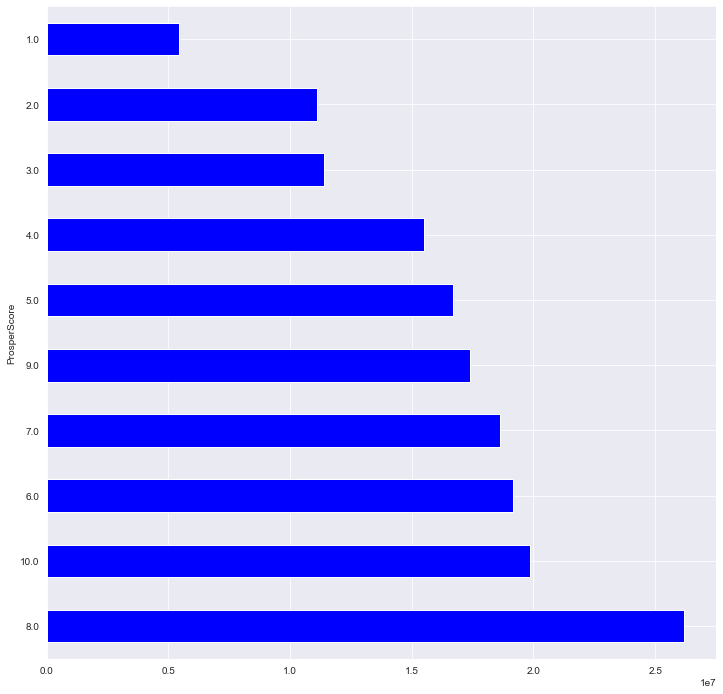

In [74]:
tpp_ps = prosper.groupby('ProsperScore').sum().ProsperPrincipalBorrowed.sort_values(ascending=False)
plt.figure(figsize = [12, 12])
tpp_ps.plot(kind="barh", color="blue");

Those with prosper scores between 6 and 10 borrowed more than 1 to5

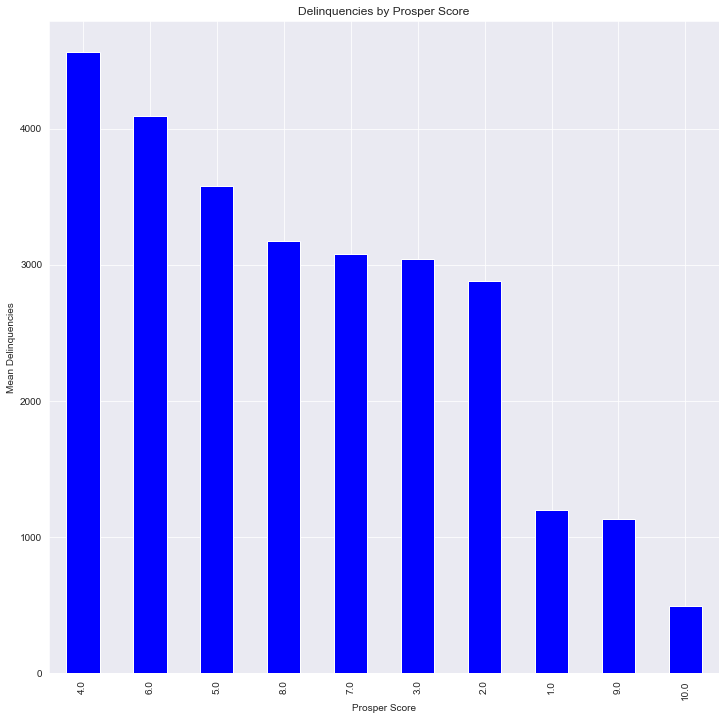

In [75]:
# Lets see how prosper score categories fare with delinquencies
cd_ps = prosper.groupby('ProsperScore').sum().CurrentDelinquencies.sort_values(ascending=False)
plt.figure(figsize = [12, 12])
cd_ps.plot(kind="bar", color="blue")
plt.xlabel('Prosper Score')
plt.ylabel('Mean Delinquencies')
plt.title('Delinquencies by Prosper Score');


Those with a prosper score of 9 and 10 have the lowest number of delinquencies. You would expect other high scores to have lower delinquencies but it seems to be a mixed bag.

In [76]:
# plt.figure(figsize = [12, 6])
# #xlog_data = np.log10(prosper.BorrowerRate)
# ylog_data = np.log10(prosper.LenderYield)
# #xlog_bin = np.arange(0, 5+0.1, 0.1)
# #plt.xticks(xlog_bin)
# ylog_bin = np.arange(0.03, 0.34+0.1, 0.1)
# plt.yticks(ylog_bin)
# plt.scatter(data=prosper, x='EstimatedReturn', y=ylog_data, alpha = 1/5)
# plt.title('Favorite and Retweet Count Log transform scatter plot')
# plt.xlabel('Favorite Count')
# plt.ylabel('Retweet Count');

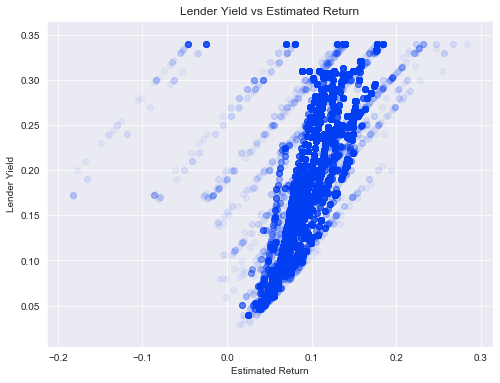

In [77]:
# Relationship between estimated return and lender yield
plt.figure(figsize = [8, 6])
plt.scatter(data=prosper, x='EstimatedReturn', y='LenderYield', alpha=1/20);
plt.xlabel('Estimated Return')
plt.ylabel('Lender Yield')
plt.title('Lender Yield vs Estimated Return');

The seems to be a good positive relationship between estimated return and lender yield. The lender yield increases as the estimated return increases

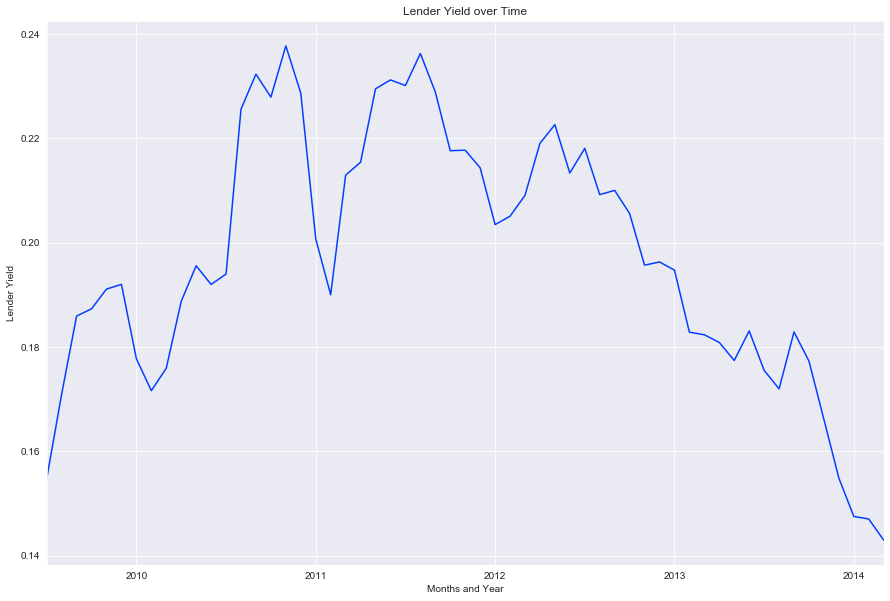

In [78]:
# Delinquencies by year
# Get number of tweets per month
month_yield = prosper.groupby(pd.Grouper(key='ListingCreationDate', freq='M')).mean().LenderYield
month_yield.plot(kind='line', figsize=(15,10))
plt.xlabel('Months and Year')
plt.ylabel('Lender Yield')
plt.title('Lender Yield over Time');

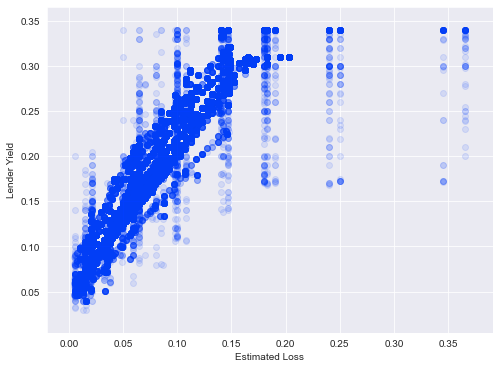

In [79]:
# Relationship between Principal  and Lender Yield
plt.figure(figsize = [8, 6])
plt.scatter(data=prosper, x='EstimatedLoss', y='LenderYield', alpha=1/10);
plt.xlabel('Estimated Loss')
plt.ylabel('Lender Yield');

### MULTIVARIATE ANALYSIS

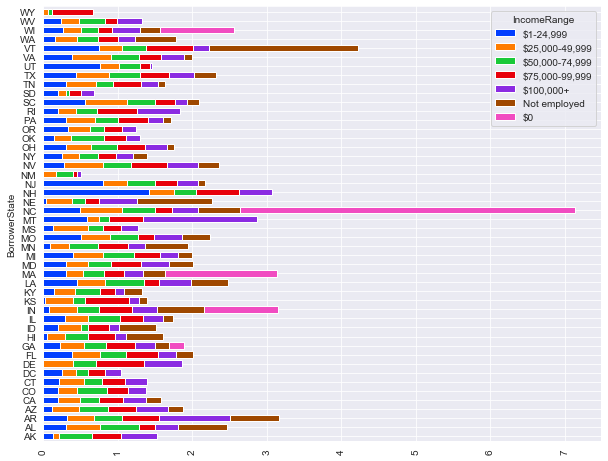

In [80]:
# Lets add Income Range to the Delinquencies by State
bic = (prosper.pivot_table(index='BorrowerState', columns='IncomeRange', values='CurrentDelinquencies', aggfunc='mean'))
bic.plot(kind='barh', stacked=True, figsize=(10,8), width= 0.7)
plt.xticks(rotation=90);

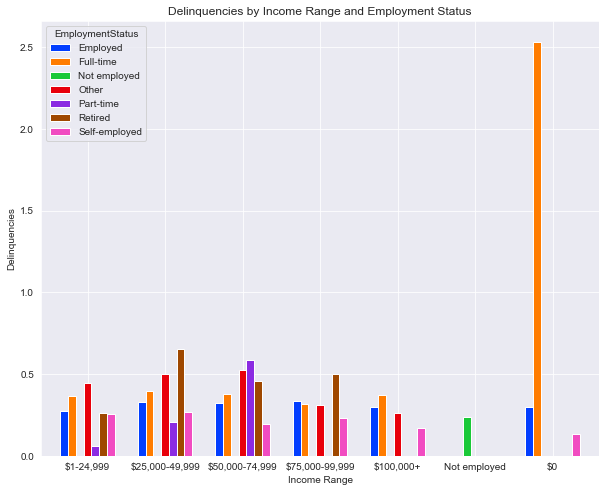

In [81]:
# Lets add Employement status to the Delinquencies by Income range
iec = (prosper.pivot_table(index='IncomeRange', columns='EmploymentStatus', values='CurrentDelinquencies', aggfunc='mean', dropna=True))
iec.plot(kind='bar', stacked=False, figsize=(10,8), width= 0.7)
plt.xticks(rotation=0)
plt.xlabel('Income Range')
plt.ylabel('Delinquencies')
plt.title('Delinquencies by Income Range and Employment Status');

There doesnt seem to be any stand out trend. Will come back to this later

In [82]:
iec

EmploymentStatus,Employed,Full-time,Not employed,Other,Part-time,Retired,Self-employed
IncomeRange,,,,,,,
"$1-24,999",0.276917,0.367150,NaN,0.448203,0.062500,0.261261,0.257453
"$25,000-49,999",0.329572,0.398159,NaN,0.502797,0.205128,0.656250,0.270958
"$50,000-74,999",0.321919,0.378314,NaN,0.527294,0.583333,0.456790,0.195185
"$75,000-99,999",0.335816,0.314145,NaN,0.308696,0.000000,0.500000,0.233542
"$100,000+",0.295458,0.374780,NaN,0.261905,NaN,0.000000,0.169405
Not employed,NaN,NaN,0.238829,NaN,NaN,NaN,NaN
$0,0.300000,2.533333,NaN,NaN,0.000000,NaN,0.133333


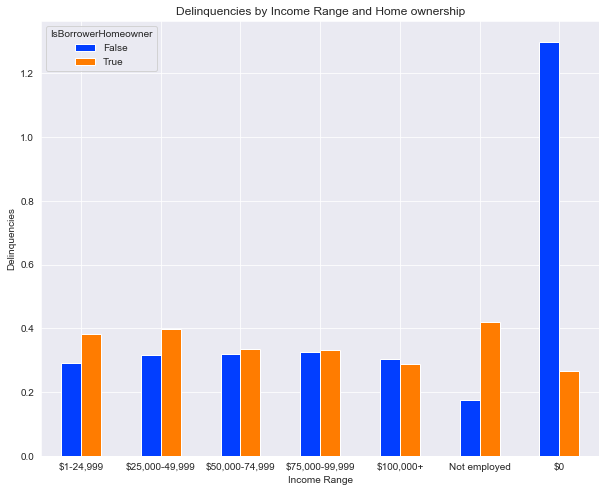

In [83]:
# Lets add Homeowner status to the Delinquencies by Income range
tde = (prosper.pivot_table(index='IncomeRange', columns='IsBorrowerHomeowner', values='CurrentDelinquencies', aggfunc='mean', dropna=True))
tde.plot(kind='bar', stacked=False, figsize=(10,8))
plt.xticks(rotation=0)
plt.xlabel('Income Range')
plt.ylabel('Delinquencies')
plt.title('Delinquencies by Income Range and Home ownership');

For incomes less than 99k having a home doesnt lower the rate of delinquency. Its only those making 100k that delinquency is higher for those without a home. Those with no income and no home have a very high delinquency rate

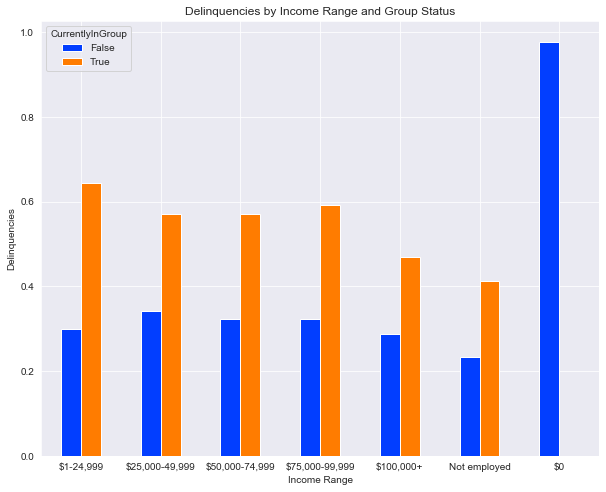

In [84]:
# Lets add Group status to the Delinquencies by Income range
tde = (prosper.pivot_table(index='IncomeRange', columns='CurrentlyInGroup', values='CurrentDelinquencies', aggfunc='mean'))
tde.plot(kind='bar', stacked=False, figsize=(10,8))
plt.xticks(rotation=0)
plt.xlabel('Income Range')
plt.ylabel('Delinquencies')
plt.title('Delinquencies by Income Range and Group Status');

Those in groups are overwhelminly more deliquent that those not in groups across majority income streams

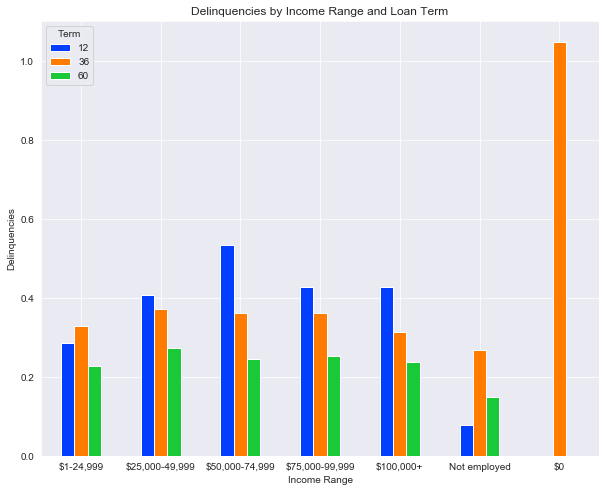

In [85]:
# Lets add loan Term to the Delinquencies by Income range
tde = (prosper.pivot_table(index='IncomeRange', columns='Term', values='CurrentDelinquencies', aggfunc='mean'))
tde.plot(kind='bar', stacked=False, figsize=(10,8))
plt.xticks(rotation=0)
plt.xlabel('Income Range')
plt.ylabel('Delinquencies')
plt.title('Delinquencies by Income Range and Loan Term');

The 12 month term loans are most delinquent from 25k t 100k income range with over 40% delinquency in each. The 1 - 24k and not employed are most delinquent in the 36 month . The least delinquent in the majority of income groups is the 60 month loan term

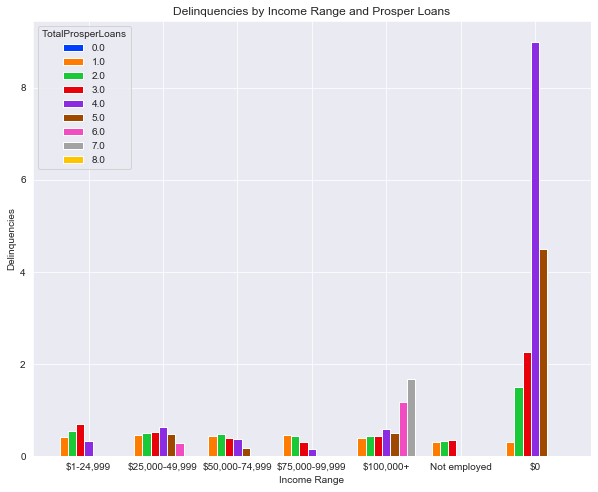

In [86]:
# Lets add Total Prosper loans to the Delinquencies by Income range

tde = (prosper.pivot_table(index='IncomeRange', columns='TotalProsperLoans', values='CurrentDelinquencies', aggfunc='mean'))
tde.plot(kind='bar', stacked=False, figsize=(10,8), width=1)
plt.xticks(rotation=0)
plt.xlabel('Income Range')
plt.ylabel('Delinquencies')
plt.title('Delinquencies by Income Range and Prosper Loans');

More of a mixed bag doesnt seem like any standouts except in the no income range

In [87]:
prosper.BorrowerRate.value_counts()

0.3177    3672
0.3199    1645
0.2699    1314
0.3500     802
0.1099     797
          ... 
0.2872       1
0.1540       1
0.2363       1
0.0713       1
0.1523       1
Name: BorrowerRate, Length: 1229, dtype: int64

In [88]:
# # Lets add Employement status to the Delinquencies by Income range
# tde = (prosper.pivot_table(index='IncomeRange', columns='ProsperPrincipalBorrowed', values='CurrentDelinquencies', aggfunc='sum'))
# tde.plot(kind='bar', stacked=False, figsize=(10,8))
# plt.xticks(rotation=90);

In [89]:
prosper.IncomeRange.value_counts()

$50,000-74,999    25261
$25,000-49,999    24047
$100,000+         14565
$75,000-99,999    14183
$1-24,999          4647
Not employed        649
$0                   45
Not displayed         0
Name: IncomeRange, dtype: int64

In [90]:
prosper.groupby('IncomeRange').mean().CurrentDelinquencies.sort_values(ascending=False)

IncomeRange
$0                0.955556
$25,000-49,999    0.347112
$50,000-74,999    0.329282
$75,000-99,999    0.329056
$1-24,999         0.310523
$100,000+         0.292894
Not employed      0.238829
Not displayed          NaN
Name: CurrentDelinquencies, dtype: float64

In [91]:
prosper.groupby('IncomeRange').sum().CurrentDelinquencies

IncomeRange
$1-24,999         1443.0
$25,000-49,999    8347.0
$50,000-74,999    8318.0
$75,000-99,999    4667.0
$100,000+         4266.0
Not displayed        0.0
Not employed       155.0
$0                  43.0
Name: CurrentDelinquencies, dtype: float64

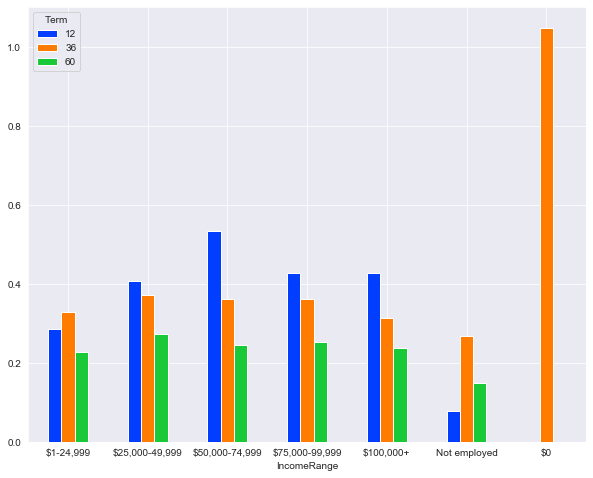

In [111]:
# Lets add term to delinquencies by income range to find out breakdown of term by income ranges
tic = (prosper.pivot_table(index='IncomeRange', columns='Term', values='CurrentDelinquencies', aggfunc='mean'))
tic.plot(kind='bar', stacked=False, figsize=(10,8))
plt.xticks(rotation=0);

The 25k to 49k range had the most 36 month loan delinquency

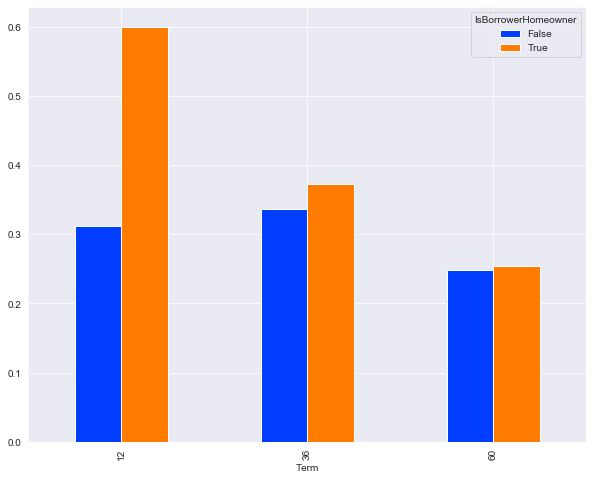

In [93]:
s = (prosper.pivot_table(index='Term', columns='IsBorrowerHomeowner', values='CurrentDelinquencies', aggfunc='mean'))
s.plot(kind='bar', stacked=False, figsize=(10,8))
plt.xticks(rotation=90);

36 month term loans are the most delinquent for home and non home owners. The home owners have more delinquencies overall

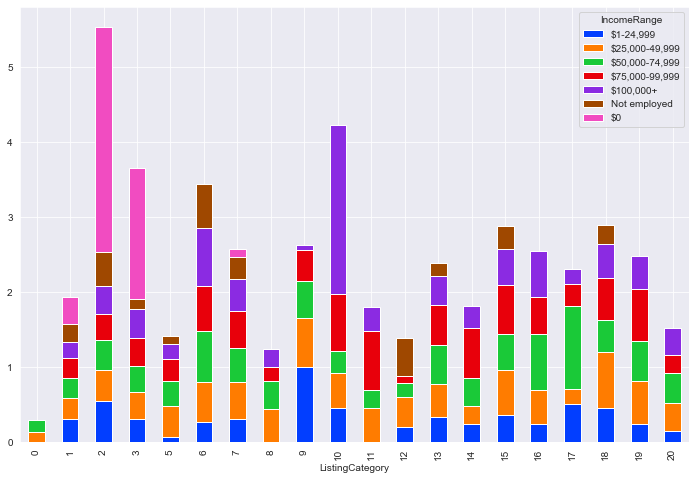

In [94]:
b = (prosper.pivot_table(index='ListingCategory', columns='IncomeRange', values='CurrentDelinquencies', aggfunc='mean'))
b.plot(kind='bar', stacked=True, figsize=(12,8))
plt.xticks(rotation=90);

<Figure size 576x432 with 0 Axes>

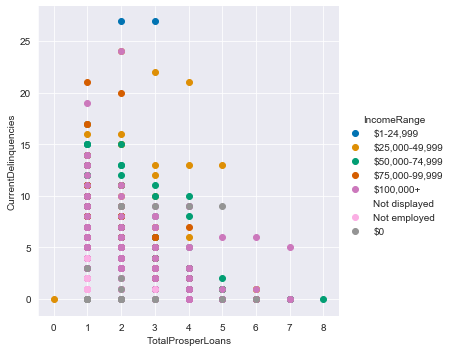

In [95]:
# Add income range to Total prosper loans and Delinquencies
plt.figure(figsize = [8, 6]);
g = sb.FacetGrid(data = prosper, hue = 'IncomeRange', height = 5,
                 palette = 'colorblind')
g.map(plt.scatter, 'TotalProsperLoans', 'CurrentDelinquencies')
g.add_legend();

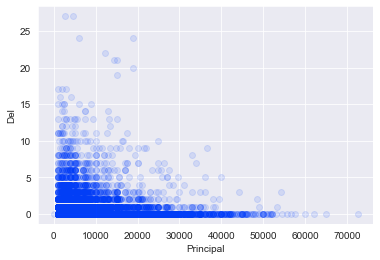

In [96]:
# Relationship between estimated return and lender yield
plt.scatter(data=prosper, x='ProsperPrincipalBorrowed', y='CurrentDelinquencies', alpha=1/9);
plt.xlabel('Principal')
plt.ylabel('Del');

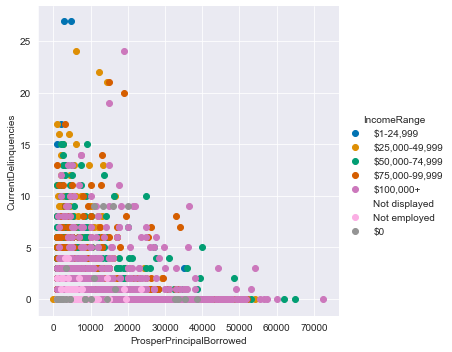

In [97]:
# Principal borrowed and Deliquencies by Income Range
g = sb.FacetGrid(data = prosper, hue = 'IncomeRange', height = 5,
                 palette = 'colorblind')
g.map(plt.scatter, 'ProsperPrincipalBorrowed', 'CurrentDelinquencies')
g.add_legend();

The above scatter plot seems confusing. Lets try a different approach

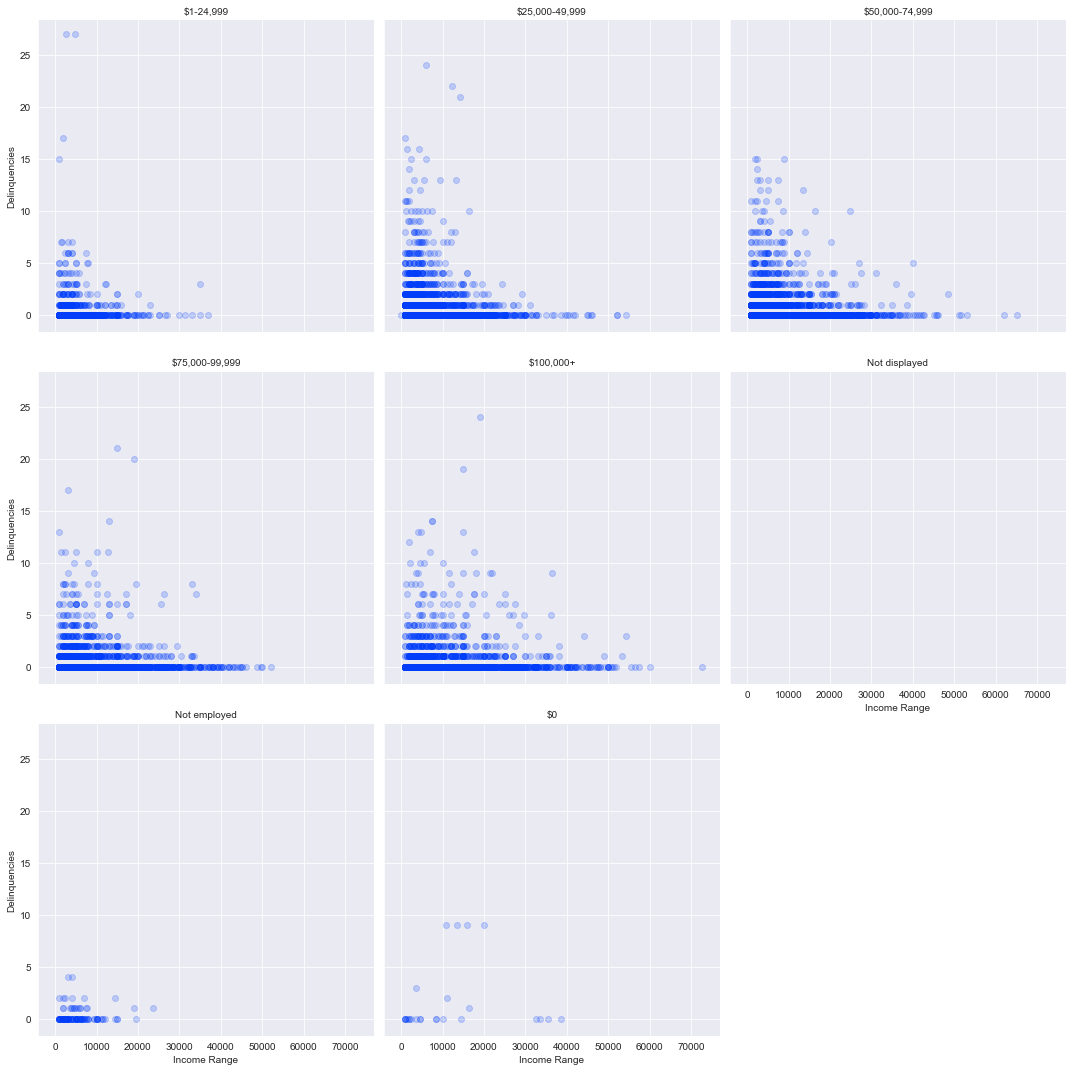

In [98]:
# Principal borrowed and Deliquencies by Income Range
g = sb.FacetGrid(data = prosper, col = 'IncomeRange', height = 5, col_wrap = 3, margin_titles = True, dropna=True)
g.map(plt.scatter, 'ProsperPrincipalBorrowed', 'CurrentDelinquencies', alpha = 1/5);
g.set_ylabels('Delinquencies')
g.set_xlabels('Princical Borrowed')
g.set_titles('{col_name}');

Principal borrowed and Deliquencies by Income Range have a negative relationship even after the Income Range is added as a 3rd variable. As the principal borrowed increases, delinquency reduces. The $0 income range has few entries so its difficult to make conclusions

In [99]:
prosper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83397 entries, 1 to 113936
Data columns (total 82 columns):
ListingKey                             83397 non-null object
ListingNumber                          83397 non-null int64
ListingCreationDate                    83397 non-null datetime64[ns]
CreditGrade                            0 non-null object
Term                                   83397 non-null category
LoanStatus                             83397 non-null category
ClosedDate                             25973 non-null object
BorrowerAPR                            83397 non-null float64
BorrowerRate                           83397 non-null float64
LenderYield                            83397 non-null float64
EstimatedEffectiveYield                83397 non-null float64
EstimatedLoss                          83397 non-null float64
EstimatedReturn                        83397 non-null float64
ProsperRating (numeric)                83397 non-null float64
ProsperRating (Alpha) 

### 2

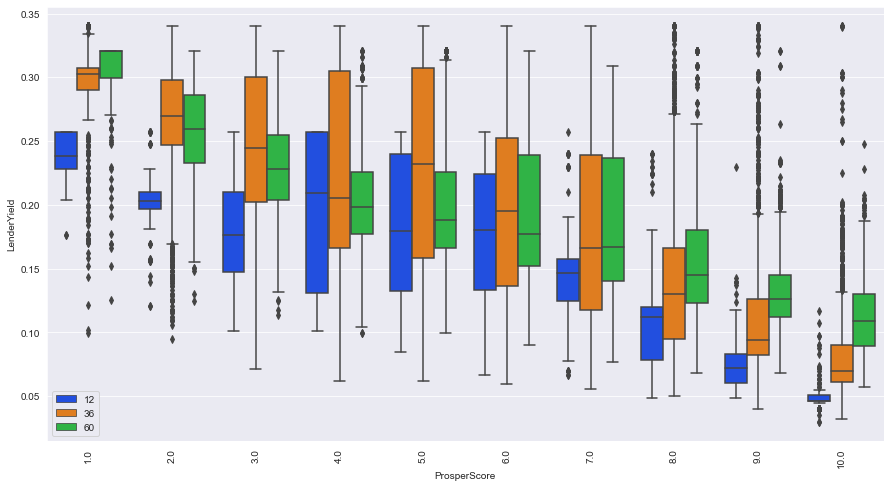

In [100]:
# Prosper score and Lender yield by Term
plt.figure(figsize = [15, 8])
base_color = sb.color_palette()[0]
sb.boxplot(data = prosper, x = 'ProsperScore', y = 'LenderYield', hue= 'Term')
plt.xticks(rotation=90)
plt.legend(loc=0);

Prosper score bewteen 7 to 10, the best average yields are for those loans that are 60 months long. The majority of the outliers are also on the upside. For prosper scores 1, 2, 3, 5 and 6, loans with 36 months tenure have better yields. Most of the outliers are on the lower side.  Its only Prosper score 4 that has the best yield on 12 month loans

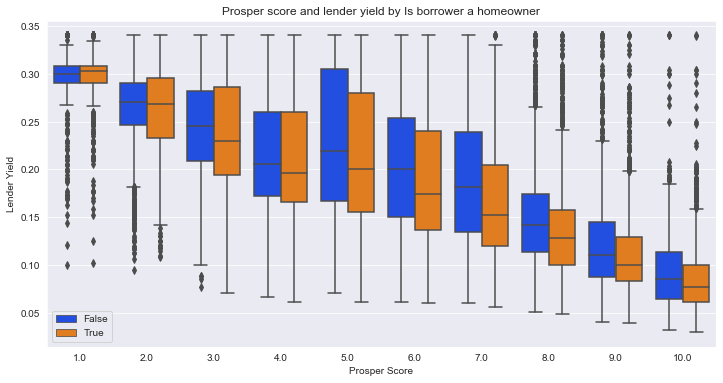

In [101]:
# Prosper score and lender yield by Is borrower a homeowner
plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]
sb.boxplot(data = prosper, x = 'ProsperScore', y = 'LenderYield', hue= 'IsBorrowerHomeowner')
plt.xticks(rotation=0)
plt.xlabel('Prosper Score')
plt.ylabel('Lender Yield')
plt.title('Prosper score and lender yield by Is borrower a homeowner')
plt.legend(loc=0);

For every prosper score the average Lender yield is lower for homeowners. The only exception is the prosper score 1 where the homeowner loan has a higher average yield than the borrower without a home.

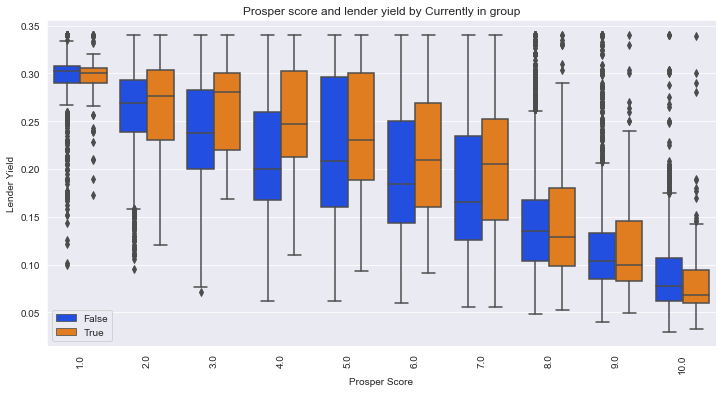

In [102]:
# Prosper score and lender yield by Currently in group
plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]
sb.boxplot(data = prosper, x = 'ProsperScore', y = 'LenderYield', hue= 'CurrentlyInGroup')
plt.xticks(rotation=90)
plt.legend(loc=0)
plt.xlabel('Prosper Score')
plt.ylabel('Lender Yield')
plt.title('Prosper score and lender yield by Currently in group');

The prosper score of 2 to 7, lenders yield is higher when the borrower is in a group. This is however different for all other prosper scores where those not in a group offer better yields for the lender.

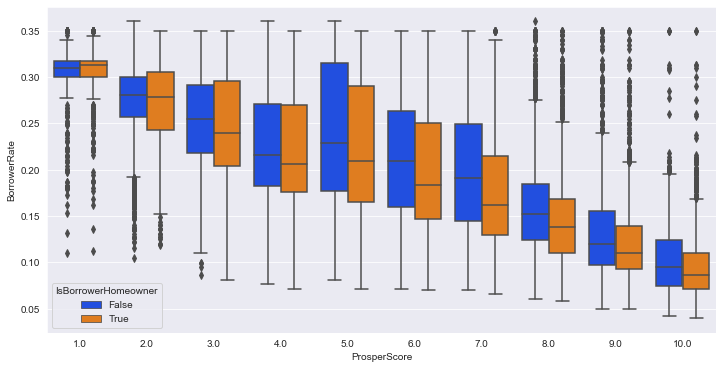

In [103]:
# Prosper score and borrower rate by is borrower homeowner
plt.figure(figsize = [12, 6])
sb.boxplot(data = prosper, x = 'ProsperScore', y = 'BorrowerRate', hue='IsBorrowerHomeowner');

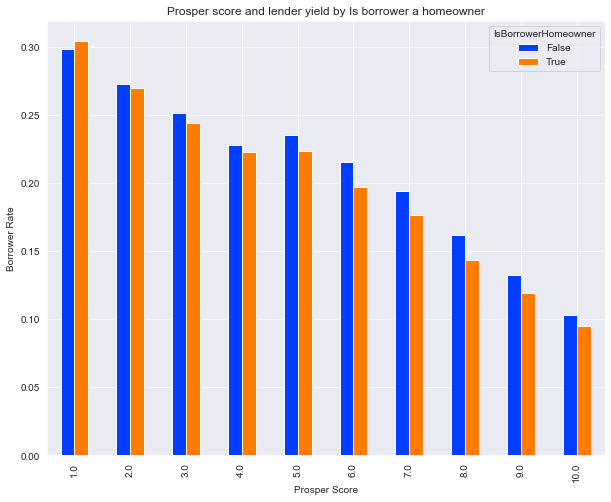

In [104]:
# Explore prosper score and borrower rate by is borrower home owner
pib = (prosper.pivot_table(index='ProsperScore', columns='IsBorrowerHomeowner', values='BorrowerRate', aggfunc='mean'))
pib.plot(kind='bar', stacked=False, figsize=(10,8))
plt.xticks(rotation=90)
plt.xlabel('Prosper Score')
plt.ylabel('Borrower Rate')
plt.title('Prosper score and lender yield by Is borrower a homeowner');

The borrower rate is lower for all Prosper scores with homes. The only exception is Prosper score 1 were homeowners get a higher rate.

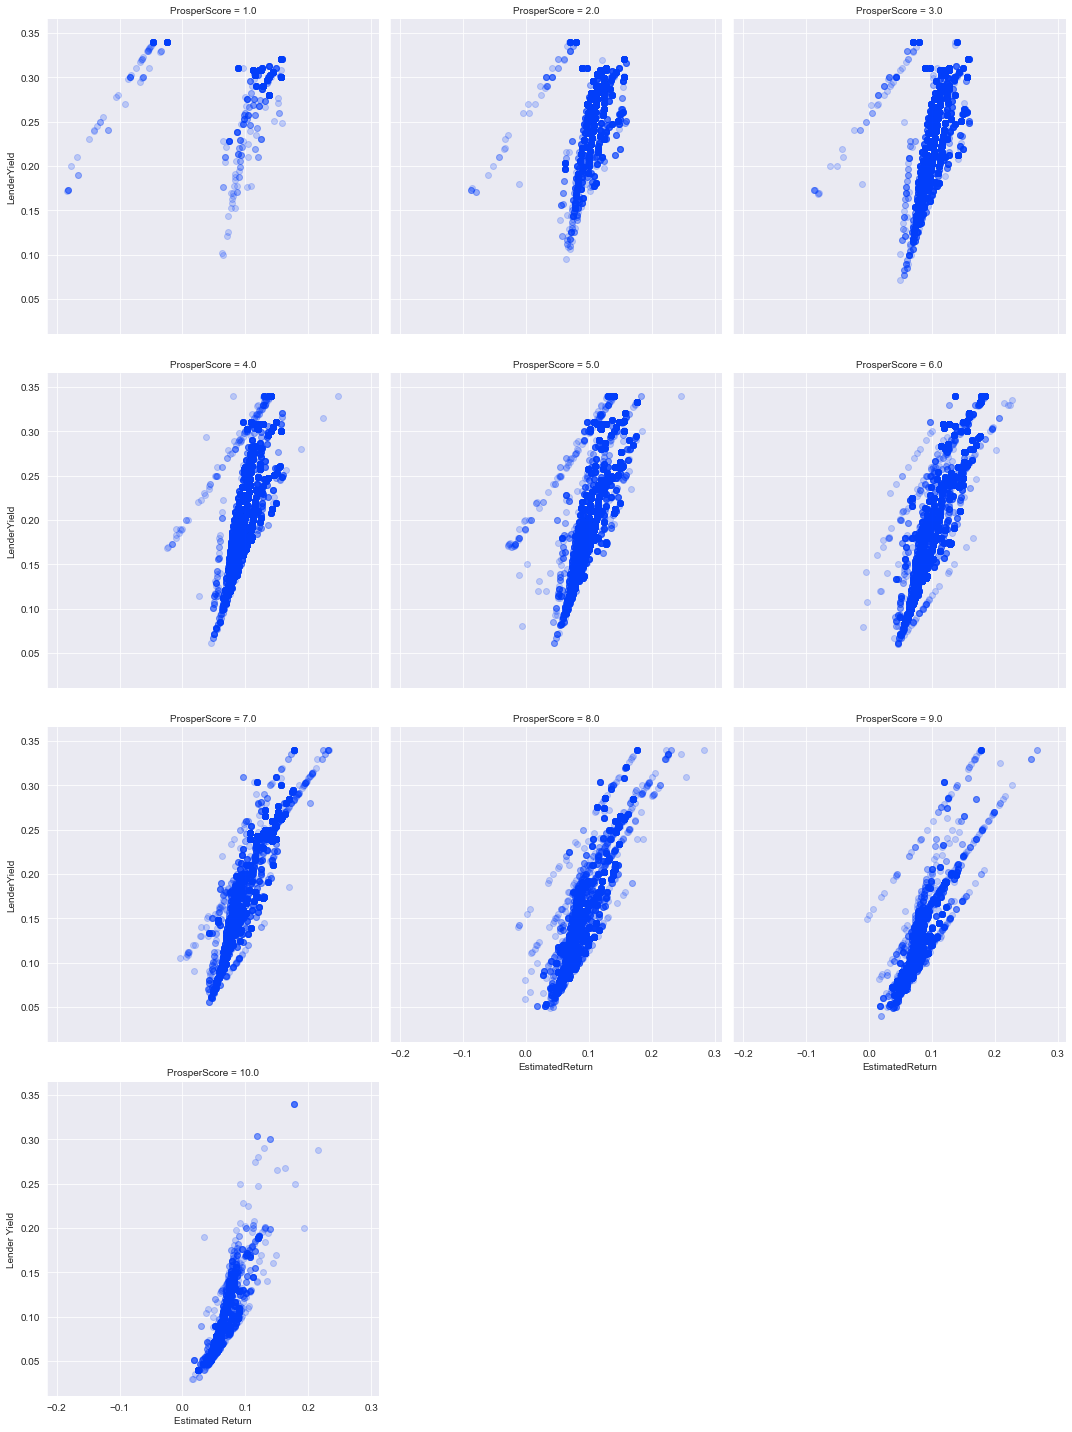

In [105]:
# Lets add Prosper score to the Relationship between estimated return and lender yield

g = sb.FacetGrid(data = prosper, col = 'ProsperScore', height = 5, col_wrap = 3, margin_titles = True)
g.map(plt.scatter, 'EstimatedReturn', 'LenderYield', alpha = 1/5);
plt.xlabel('Estimated Return')
plt.ylabel('Lender Yield');

The estimated return and the Lender yeild have a positive relationship. Its the same for all prosper scores

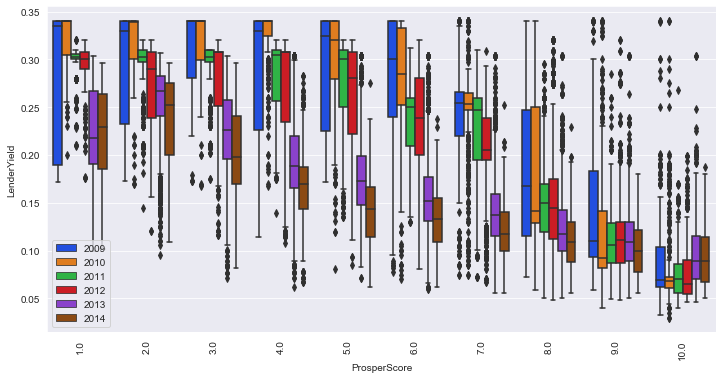

In [106]:
# Prosper score and lender yeild by year
plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]
sb.boxplot(data = prosper, x = 'ProsperScore', y = 'LenderYield', hue= 'year')
plt.xticks(rotation=90)
plt.legend(loc=0);

In [107]:
# Lets get average monthly Lenders yield
month_yield = prosper.groupby(pd.Grouper(key='ListingCreationDate', freq='M')).mean().LenderYield

In [108]:
# Lets get average monthly Estimated return
month_return = prosper.groupby(pd.Grouper(key='ListingCreationDate', freq='M')).mean().EstimatedReturn

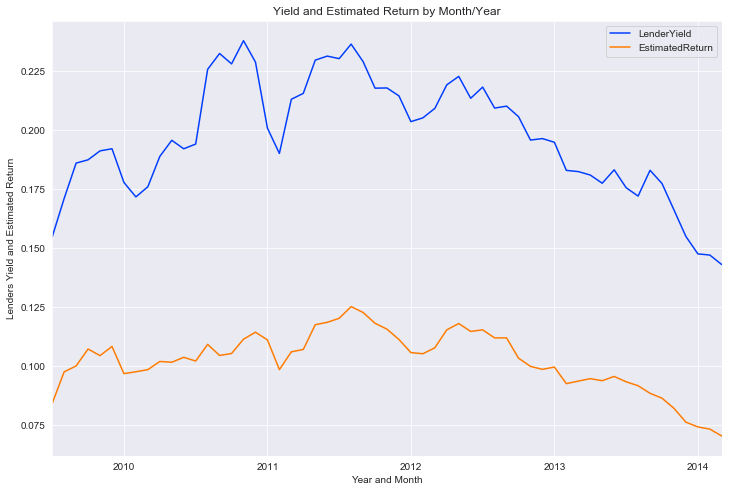

In [109]:
# Plot line chart for Yield and Estimated Return by Month/Year
plt.figure(figsize=(12, 8)) 
month_yield.plot(kind='line')
month_return.plot(kind='line')
plt.xlabel('Year and Month')
plt.ylabel('Lenders Yield and Estimated Return')
plt.legend();
plt.title('Yield and Estimated Return by Month/Year');

From the line chart the Lenders Yield is always higher than the estimated return for all the years plotted

In [110]:
prosper.EmploymentStatus.value_counts()

Employed         65945
Full-time         7913
Self-employed     4495
Other             3772
Not employed       649
Retired            367
Part-time          256
Name: EmploymentStatus, dtype: int64